# Relación entre variables

Dos variables pueden estar relacionadas entre si de varias formas. En esta sección vamos a ver como podemos averiguar las relaciones que pueden existir entre dos variables.

Pero antes veamos unos conceptos básicos:

La variable $Y$ tiene una variación lineal respecto a $X$ si:
\\[
Y=\beta·X+a
\\]
Donde $\beta$ y $a$ son constantes fijas que definen la relación entre las dos variables. Pero en cambio, no tendremos una relación lineal en los siguientes casos:
\\[
Y=\beta·X^2+a
\\]
\\[
Y=\beta^X
\\]

# Covarianza

La covarianza es un valor que indica el grado de variación **lineal** conjunta de dos variables aleatorias respecto a sus medias.

Supongamos que queremos comparar dos variables aleatorias X e Y:
* Tendremos alta covarianza (positiva) cuando, para valores altos de X, tengamos mayoritariamente valores altos de Y
* Tendremos baja covarianza (negativa) cuando, para valores altos de X, tengamos mayoritariamente valores bajos de Y
* Tendremos covarianza cercana a 0, para valores altos de X, los valores de Y pueden ser altos o bajos por igual


Su formula es la siguiente:
\\[
cov(X,Y) = \frac{1}{N} \sum _{i=1}^N \left( x_i-\bar{x} \right)\left( y_i-\bar{y} \right)
\\]

Recordemos la formula de la varianza:
\\[
Var(x) =  \frac{1}{N} \sum _{i=1}^N \left( x_i-\bar{x} \right)^2
\\]

La covarianza de una variable aleatoria consigo misma es igual a la varianza:
\\[
cov(X,X) = Var(X)
\\]

En R la calculamos con la función *cov(x,y)*


[1] "La covarianza de las variables x, y1 es: 22.59"

[1] "La covarianza de las variables x, y2 es: 0.31"

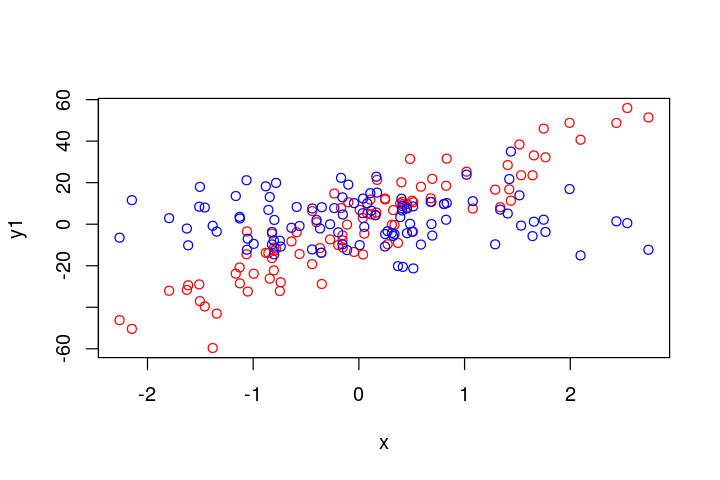

In [15]:
options(repr.plot.height=4,repr.plot.width=6)

n <- 100
x <- rnorm(n,sd=1)
y1 <- 20*x+1+rnorm(n,sd=10)
y2 <- rnorm(n,mean=2, sd=10)
paste("La covarianza de las variables x, y1 es:",round(cov(x,y1),2))
paste("La covarianza de las variables x, y2 es:",round(cov(x,y2),2))
plot(x,y1,col='red')
points(x,y2,col="blue")

En cambio en el siguiente ejemplo la covarianza falla al tratar de encontrar una relación entre dos variables al no ser esta lineal.

[1] "La covarianza de las variables x, y es: 0.43"

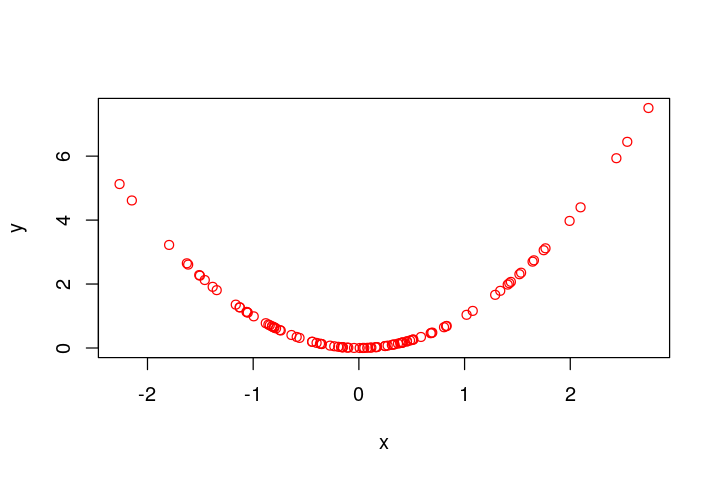

In [16]:
y <- x^2
paste("La covarianza de las variables x, y es:",round(cov(x,y),2))
plot(x,y,col='red')

### Ejemplo para finanzas


En el mercado bursátil, se pone un gran énfasis en reducir el riesgo asumido. Esto generalmente significa que estas acciones no se mueven en la misma dirección. Se suelen elegir acciones que tienen una menor covarianza entre si.
Esto se suele hacer no sobre el valor de la acción en sí, sino sobre la tasa de retorno al final de cada día.

In [4]:
suppressWarnings(require("quantmod"))
start <- as.Date("2000-01-01")
end <- as.Date("2018-01-01")
TEF<-getSymbols("TEF.MC", src = "yahoo", from = start, to = end,auto.assign = F)
SAN<-getSymbols("SAN.MC", src = "yahoo", from = start, to = end,auto.assign = F)
BBVA<-getSymbols("BBVA.MC", src = "yahoo", from = start, to = end,auto.assign = F)

Loading required package: quantmod
Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.
‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.

Warning message:
“TEF.MC contains missing values. Some functions will not work if objects contain mis

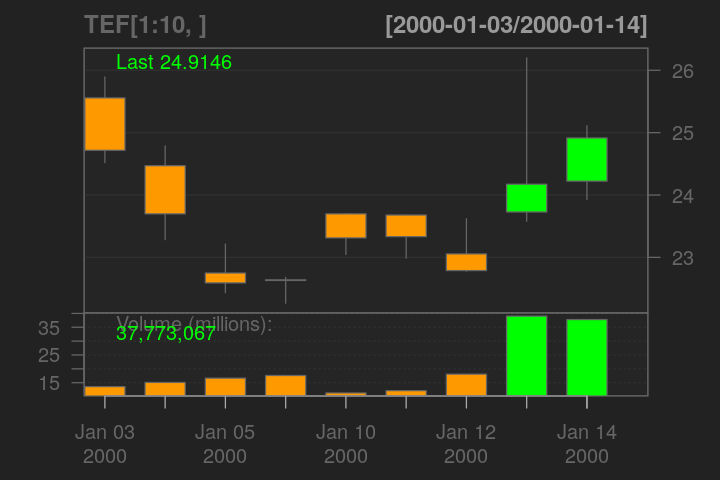

In [5]:
candleChart(TEF[1:10,])

In [6]:
head(TEF)
str(TEF)

           TEF.MC.Open TEF.MC.High TEF.MC.Low TEF.MC.Close TEF.MC.Volume
2000-01-03     25.5572     25.8934    24.5191      24.7168      13579849
2000-01-04     24.4697     24.7861    23.2833      23.6985      15091975
2000-01-05     22.7494     23.2141    22.4330      22.5912      16630987
2000-01-06          NA          NA         NA           NA            NA
2000-01-07     22.6406     22.6802    22.2649      22.6307      17595592
2000-01-10     23.6985     23.6985    23.0460      23.3129      11308250
           TEF.MC.Adjusted
2000-01-03       10.129603
2000-01-04        9.712274
2000-01-05        9.258474
2000-01-06              NA
2000-01-07        9.274661
2000-01-10        9.554245

An ‘xts’ object on 2000-01-03/2017-12-29 containing:
  Data: num [1:4630, 1:6] 25.6 24.5 22.7 NA 22.6 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:6] "TEF.MC.Open" "TEF.MC.High" "TEF.MC.Low" "TEF.MC.Close" ...
  Indexed by objects of class: [Date] TZ: UTC
  xts Attributes:  
List of 2
 $ src    : chr "yahoo"
 $ updated: POSIXct[1:1], format: "2019-07-11 21:33:39"


In [7]:
convertToDf<-function(stock){
    valueAdjusted <- stock[,6]
    df <- data.frame(index(valueAdjusted), valueAdjusted, row.names=1:length(valueAdjusted))
    colnames(df) <- c("date",gsub(".Adjusted","",names(valueAdjusted)))
    df
}

df_TEF <- convertToDf(TEF)
df_SAN <- convertToDf(SAN)
df_BBVA <- convertToDf(BBVA)
head(df_TEF)
str(df_SAN)

date,TEF.MC
<date>,<dbl>
2000-01-03,10.129603
2000-01-04,9.712274
2000-01-05,9.258474
2000-01-06,NA
2000-01-07,9.274661
2000-01-10,9.554245


'data.frame':	4630 obs. of  2 variables:
 $ date  : Date, format: "2000-01-03" "2000-01-04" ...
 $ SAN.MC: num  3.26 3.19 3.11 3.11 3.25 ...


In [8]:
df_total <- merge(df_TEF,df_SAN,by="date", all=T)
df_total <- merge(df_total,df_BBVA,by="date", all=T)

seq1 <- 1:(nrow(df_total)-1)
seq2 <- 2:nrow(df_total)

roi <- (df_total[seq2,2:ncol(df_total)]/df_total[seq1,2:ncol(df_total)]-1)*100


head(roi)

,TEF.MC,SAN.MC,BBVA.MC
,<dbl>,<dbl>,<dbl>
2,-4.11989493,-2.3731126,-2.609458
3,-4.67243820,-2.4298254,-2.245287
4,NA,0.0000000,NA
5,NA,4.4280399,NA
6,3.01449293,-0.8832515,-1.609593
7,0.08490467,-3.3869424,-2.007461


In [9]:
paste("La covarianza entre las tasas de retorno del BBVA y TEF es:",
      cov(roi$BBVA.MC,roi$TEF.MC, use="complete.obs"))
paste("La covarianza entre las tasas de retorno del BBVA y SAN es:",
      cov(roi$BBVA.MC,roi$SAN.MC, use="complete.obs"))

[1] "La covarianza entre las tasas de retorno del BBVA y TEF es: 2.81759025596089"

[1] "La covarianza entre las tasas de retorno del BBVA y SAN es: 4.24644252498442"

Como cabría esperar existe una gran covarianza entre los bancos, Santander y BBVA, que no se da con Telefónica. Pero la covarianza tiene un problema y es que no está normalizada.

La covarianza entre dos variables puede ser muy alta porque la varianza de una de las variables es muy alta o porque existe una relación alta entre cada una de ellas.

## Matriz de covarianza

La matriz de covarianza muestra la varianza entre $n$ variables en forma de matriz $n \times n$, donde el valor de la celda ij es la covarianza de la secuencia i con la secuencia j, el valor de la diagonal es la varianza de la secuencia correspondiente.

In [17]:
cov(cbind(x,y1,y2))

,x,y1,y2
x,1.1030993,22.58857,0.3050654
y1,22.5885730,553.21173,16.8005241
y2,0.3050654,16.80052,121.4630200


La matriz de covarianza nos sirve para de de un vistazo general la relación entre las diferentes variables. Si volvemos al caso anterior de las acciones se puede ver claramente que acciones están más relacionadas entre sí y cuales presentan una mayora varianza.

In [13]:
cov(roi, use="complete.obs")

,TEF.MC,SAN.MC,BBVA.MC
TEF.MC,3.473658,2.846846,2.817590
SAN.MC,2.846846,4.966018,4.252581
BBVA.MC,2.817590,4.252581,4.636257


# Correlación

La correlación es un valor que indica el grado de variación conjunta y **lineal** de dos variables aleatorias. Es la covarianza normalizada en el rango $[-1,1]$. Es una forma de ignorar la variación de cada una de las variables en si y centrarse únicamente en la relación que existe entre ambas, ya que una covarianza alta puede venir dada también porque una de las variables a estudiar tenga una varianza elevada.

Supongamos que queremos comparar dos variables aleatorias X e Y:
* Correlación cercana a 1, para valores altos de X, tengamos mayoritariamente valores altos de Y
* Correlación cercana a -1, para valores altos de X, tengamos mayoritariamente valores bajos de Y
* Correlación cercana a 0, para valores altos de X, los valores de Y pueden ser altos o bajos por igual


La función de correlación es:
\\[
\rho_{X,Y} = corr (X,Y) = \frac{cov(X,Y)}{\sigma_X \sigma_Y} 
\\]


Al igual que con la covarianza podemos calcular una matriz de correlación. Se utiliza para ver de forma sencilla cual es la relación entre varias variables. En una matriz de correlación la diagonal será siempre 1 (la correlación de una variable consigo misma es 1) y el valor de la celda *ij* vendrá dado por la correlación de la variable i con j.


En R la calculamos con la función *cor(x,y)*


In [18]:
cr1<-cor(x,y1)
cr2<-cor(x,y2)
paste("La correlación de las variables x,y1 es:",round(cr1,2))
paste("La correlación de las variables x,y2 es:",round(cr2,2))

cr<-cor(x,y)
paste("La correlación de las variables x,y es:",round(cr,2))

[1] "La correlación de las variables x,y1 es: 0.91"

[1] "La correlación de las variables x,y2 es: 0.03"

[1] "La correlación de las variables x,y es: 0.27"

## Correlación no implica causalidad

Que dos variables estén correladas no implica que una una es la causa de la otra, es decir, que haya una relación directa entre ambas.

Por ejemplo, existe una correlación de 0.992558 entre la tasa de divorcio en el estado de Maine y el consumo de margarina por habitante:
![](pics/correlacion-margarina-divorcio.png)

Fallos comunes que pueden llevar a buscar una correlación alta:
* Utiliza solo la ventana de datos que te interesa.
* Compara muchas variables entre sí, por puro azar algunas evolucionarán a la par.

Más ejemplos en [tylervigen](http://www.tylervigen.com/spurious-correlations).



Relacionada: https://xkcd.com/552/

Dos variables también pueden estar correladas entre sí, pero la causalidad puede ser debida a una tercera variable oculta que no vemos.
Por ejemplo:

In [20]:
set.seed(2807)

x<- rnorm(100)
y <- 2*x + 1+ rnorm(100,0,0.1)
paste("La correlación entre x,y es",cor(x,y))


z <- 2*x + 1+ rnorm(100,0,0.1)
paste("La correlación entre x,z es",cor(x,z))


paste("Aunque no existe ninguna relación directa entre z,y existe una alta correlación:", cor(y,z))

[1] "La correlación entre x,y es 0.998826076751464"

[1] "La correlación entre x,z es 0.998750973902264"

[1] "Aunque no existe ninguna relación directa entre z,y existe una alta correlación: 0.997110500303841"

#### Correlación entre colesterol y ataques al corazón

Existe una alta correlación en aquellos paises cuyos habitantes toman grasas saturadas (asociadas con un nivel de colesterol más alto) y aquellos cuyos número de enfermedades cardiovasculares es más elevado.

Pero existe un problema en esta correlación, Francia y Finlandia presentan aproximadamente los mismos niveles de ingesta de grasas saturadas, pero los franceses tienen un porcentaje bajo de enfermedades cardiovasculares.

Parece que hay algún otro componente en la dieta que puede estar relacionado con la calidad de la alimentación que es el que realmente influye a la hora de tener o no una enfermedad cardiovascular.


[The French paradox: lessons for other countries](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1768013/)


[Differences in Coronary Mortalit Can Be
Explained by Differences in Cholesterol and
Saturated Fat Intakes in 40 Countries but
Not in France and Finland
A Paradox](https://pdfs.semanticscholar.org/fb57/b6dddc3649702b9e79ae4575ad8a38970d8c.pdf)

### Ejemplo de Matriz de correlación: Mercado continuo

Si se decide invertir en acciones, una política conservadora consiste en diversificar lo máximo posible. Es decir, invertir en empresas que no tengan relaciones. De esta forma si un sector entra en crisis, las empresas de otro sector pueden no verse perjudicadas y salvaremos parte de nuestra inversión.

Un análisis muy sencillo puede ser mediante la matriz de correlación de diferentes empresas. Empresas que presentan un alto nivel de correlación presentan subidas y bajadas muy parecidas. De esta forma, una jugada inteligente podría ser tener un portfolio de acciones con baja correlación.

Veamos un ejemplo con unas pocas empresas y el cambio de moneda Bitcoin-Euro y el Nasdaq

In [2]:
suppressWarnings(require("quantmod"))
start <- as.Date("2000-01-01")
end <- as.Date("2018-01-01")
AAPL<-getSymbols("AAPL", src = "yahoo", from = start, to = end,auto.assign = F)
BTCEUR<-getSymbols("BTC-EUR", src = "yahoo", from = start, to = end,auto.assign = F)
IXIC<-getSymbols("^IXIC", src = "yahoo", from = start, to = end,auto.assign = F)
TEF<-getSymbols("TEF.MC", src = "yahoo", from = start, to = end,auto.assign = F)
VOD<-getSymbols("VOD", src = "yahoo", from = start, to = end,auto.assign = F)
SAN<-getSymbols("SAN.MC", src = "yahoo", from = start, to = end,auto.assign = F)
BBVA<-getSymbols("BBVA.MC", src = "yahoo", from = start, to = end,auto.assign = F)
TSLA<-getSymbols("TSLA", src = "yahoo", from = start, to = end,auto.assign = F)

Loading required package: quantmod
Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.
‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.

Warning message:
“TEF.MC contains missing values. Some functions will not work if objects contain mis

In [3]:
convertToDf<-function(stock){
    valueAdjusted<-stock[,6]
    df<-data.frame(index(valueAdjusted),valueAdjusted,row.names = 1:length(valueAdjusted))
    colnames(df)<-c("date",gsub(".Adjusted","",names(valueAdjusted)))
    df
}
df_IXIC<-convertToDf(IXIC)
df_AAPL<-convertToDf(AAPL)
df_TSLA<-convertToDf(TSLA)
df_TEF<-convertToDf(TEF)
df_VOD<-convertToDf(VOD)
df_SAN<-convertToDf(SAN)
df_BBVA<-convertToDf(BBVA)
df_BTCEUR<-convertToDf(BTCEUR)

head(df_IXIC)

date,IXIC
<date>,<dbl>
2000-01-03,4131.15
2000-01-04,3901.69
2000-01-05,3877.54
2000-01-06,3727.13
2000-01-07,3882.62
2000-01-10,4049.67


In [4]:
?merge

In [5]:
df_total<-merge(df_IXIC,df_AAPL,by="date",all = T)
head(df_total)

date,IXIC,AAPL
<date>,<dbl>,<dbl>
2000-01-03,4131.15,3.502161
2000-01-04,3901.69,3.206892
2000-01-05,3877.54,3.253822
2000-01-06,3727.13,2.972241
2000-01-07,3882.62,3.113032
2000-01-10,4049.67,3.058280


In [6]:
df_total<-merge(df_total,df_TSLA,by="date",all = T)
df_total<-merge(df_total,df_TEF,by="date",all = T)
df_total<-merge(df_total,df_VOD,by="date",all = T)
df_total<-merge(df_total,df_SAN,by="date",all = T)
df_total<-merge(df_total,df_BBVA,by="date",all = T)
df_total<-merge(df_total,df_BTCEUR,by="date",all = T)


tail(df_total)

,date,IXIC,AAPL,TSLA,TEF.MC,VOD,SAN.MC,BBVA.MC,BTC-EUR
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5340,2017-12-27,6939.34,166.7169,311.64,7.603015,28.58853,5.169875,6.712553,13087.45
5341,2017-12-28,6950.16,167.1859,315.36,7.567003,28.78688,5.124314,6.650210,12264.02
5342,2017-12-29,6903.39,165.3780,311.35,7.502367,28.75983,5.094559,6.617643,12247.68
5343,2017-12-30,NA,NA,NA,NA,NA,NA,NA,10654.40
5344,2017-12-31,NA,NA,NA,NA,NA,NA,NA,11850.31
5345,2018-01-01,NA,NA,NA,NA,NA,NA,NA,11391.39


In [7]:
cor(df_total[2:ncol(df_total)],use="complete.obs")

,IXIC,AAPL,TSLA,TEF.MC,VOD,SAN.MC,BBVA.MC,BTC-EUR
IXIC,1.0000000,0.9326825,0.9384264,0.39895456,0.7097316,0.5661051,0.6500005,0.59829585
AAPL,0.9326825,1.0000000,0.8317852,0.41043763,0.5659822,0.5324941,0.5542138,0.63141524
TSLA,0.9384264,0.8317852,1.0000000,0.47806127,0.8083695,0.6742070,0.7593886,0.48418516
TEF.MC,0.3989546,0.4104376,0.4780613,1.00000000,0.5139623,0.6650689,0.6732159,0.03141226
VOD,0.7097316,0.5659822,0.8083695,0.51396228,1.0000000,0.6247155,0.7698883,0.30957144
SAN.MC,0.5661051,0.5324941,0.6742070,0.66506893,0.6247155,1.0000000,0.9366655,0.30288806
BBVA.MC,0.6500005,0.5542138,0.7593886,0.67321589,0.7698883,0.9366655,1.0000000,0.29286153
BTC-EUR,0.5982959,0.6314152,0.4841852,0.03141226,0.3095714,0.3028881,0.2928615,1.00000000


Podemos ver como Apple y Tesla están bastante correlados con el Nasdaq, como cabría esperar, al ser este un índice de empresas tecnológicas en USA.

Curiosamente Telefónica y Vodafone se encuentran muy poco correlados, pese a pertenecer al mismo sector. Puede ser porque su área de influencia es diferente. Vodafone está más correlado con el Nasdaq que Telefónica, algo que tiene sentido ya que Vodafone opera en USA.

Se ve como la correlación entre el banco Santander y el BBVA es altísima, esto implica que ambas empresas tienen un comportamiento muy parecido. Según esto daría igual comprar acciones del Santander o del BBVA, las ganancias serían las mismas aproximadamente.

Como cabría esperar el cambio Bitcoin-Euro se encuentra poco correlado con el resto de empresas. Hay una correlación con Apple, pero seguramente se deba más a una casualidad, las acciones de Apple han subido mucho desde que sacó el iPhone, el Bitcoin también ha tenido un crecimiento muy alto en los últimos años.

# Regresión lineal


Modelo matemático usado para aproximar la relación de dependencia entre una variable dependiente $Y$, la variables independiente $X$ y un término aleatorio $\varepsilon$. Este modelo puede ser expresado como:

\\[
y_i=\beta_0+\beta_1 x_i+\varepsilon_i  \quad \text{para }i=1,\dots,n
\\]

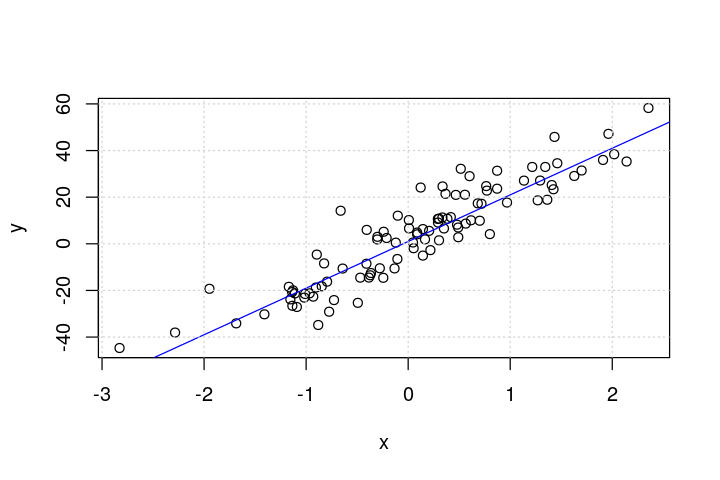

In [46]:
options(repr.plot.height=4,repr.plot.width=6)

n<-100
x<-rnorm(n,sd=1)
y<- 1+20*x+rnorm(n,mean=1,sd=10)

plot(x,y)
abline(c(1,20),col="blue")
grid()


Esto significa que se puede expandir de la forma:
\\[
\begin{split}
y_1 &=\beta_0+\beta_1 x_1+\varepsilon_1  \\
y_2 &=\beta_0+\beta_1 x_2+\varepsilon_2  \\
\vdots& \\
y_n&=\beta_0+\beta_1 x_n+\varepsilon_n 
\end{split}
\\]


donde:
* $y_i$: i-esimo valor de la variable dependiente
* $x_i$: i-esimo valor de la variable independiente
* $\beta_0, \beta_1$: parámetros a determinal que dado un conjunto de $x_i$ produce los mejores $y_i$
 * $\beta_0$ : Puede ser llamado sesgo, bias, intercept o término constante. Indica el corte en el eje Y
 * $\beta_1$ : Puede ser llamado pendiente, slope. Indica cuanto aumenta Y por cada incremento de X
* $\varepsilon_i$: error, valor aleatorio.

Podemos escribirlo en forma de matriz:
\\[
\begin{bmatrix}
 y_1 \\ 
 y_2 \\ 
 \vdots \\ 
 y_n 
\end{bmatrix}
=
\begin{bmatrix}
 1 & x_1\\ 
 1 & x_2 \\ 
 \vdots & \vdots \\ 
 1 & x_n 
\end{bmatrix}
\begin{bmatrix}
\beta_0
\\ 
\beta_1
\end{bmatrix}+
\begin{bmatrix}
 \varepsilon_1 \\ 
 \varepsilon_2 \\ 
 \vdots \\ 
 \varepsilon_n
\end{bmatrix}
\\]
Lo que se puede simplificar como:
\\[
Y=X \beta+\varepsilon
\\]




Donde:
* $Y \in \mathbb{R}^{n \times 1}$ 
* $X \in \mathbb{R}^{n \times 2}$ 
* $\beta \in \mathbb{R}^{1 \times 2}$ 
* $\varepsilon \in \mathbb{R}^{n \times 1}$ 




In [20]:
n<-10
beta<-matrix(c(5,2),nrow = 2)
X<-matrix(c(rep(1,n),1:n),ncol = 2, byrow = F)

print("El valor de la matriz X es:")
X
print("El valor de la Beta es:")
beta

[1] "El valor de la matriz X es:"


1,1
1,2
1,3
1,4
1,5
1,6
1,7
1,8
1,9
1,10


[1] "El valor de la Beta es:"


5
2


In [21]:
print("El valor de la matriz X·Beta es:")
X %*% beta

[1] "El valor de la matriz X·Beta es:"


7
9
11
13
15
17
19
21
23
25


In [22]:
print("El valor final de la matriz Y es:")
e<-rnorm(n)
Y<-X %*% beta +e
Y

[1] "El valor final de la matriz Y es:"


6.722106
6.850595
10.486470
13.099087
15.049506
16.544848
19.451043
18.667715
24.149162
25.477094


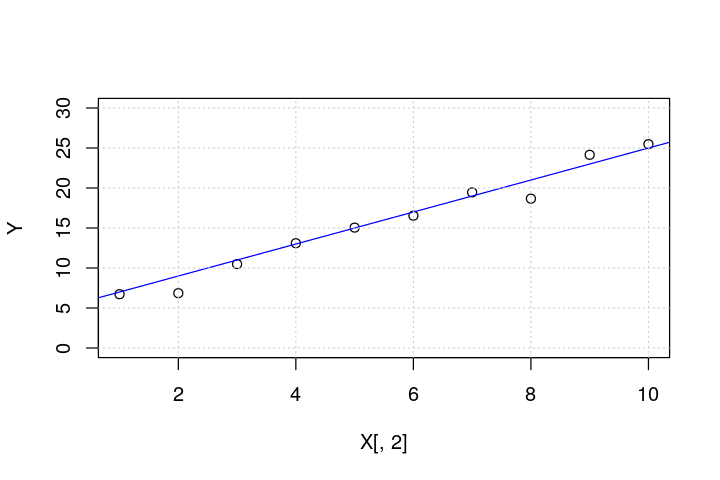

In [23]:
plot(X[,2],Y,ylim = c(0,30))
abline(beta,col="blue")
grid()

## ¿Cómo calculamos $\beta$?

### Definición de inversa de una matriz

La inversa de una matriz una matriz cuadrada $A$ se escribe $A^-1$ y se define como:
\\[
A^{-1} \cdot A=I=A \cdot A^{-1}
\\]

Donde I es la matriz identidad:
\\[
\begin{bmatrix}
1 & 0 & \dots & 0\\ 
0 & 1 & \dots & 0 \\ 
\vdots &  & \ddots &  \vdots \\ 
0 & 0  & \dots & 1
\end{bmatrix}
\\]



In [24]:
A<-matrix(c(1,3,5,2,3,4,1,7,8),nrow=3)
print("Tenemos una matriz A:")
A

[1] "Tenemos una matriz A:"


1,2,1
3,3,7
5,4,8


In [25]:
print("La inversa de A es:")
iA<-solve(A)
iA

[1] "La inversa de A es:"


-0.2666667,-0.8,0.7333333
0.7333333,0.2,-0.2666667
-0.2000000,0.4,-0.2000000


In [26]:
print("Si multiplicamos una matriz por su inversa obtenemos una matriz identidad")
iA %*% A

[1] "Si multiplicamos una matriz por su inversa obtenemos una matriz identidad"


1.000000e+00,-4.440892e-16,0.000000e+00
-2.220446e-16,1.000000e+00,-4.440892e-16
-2.220446e-16,0.000000e+00,1.000000e+00


Podemos usar la matriz inversa para resolver ecuaciones:
\\[
\begin{split}
u&=Av \\
A^{-1}u&=A^{-1}Av \\
A^{-1}u&=Iv \\
A^{-1}u&=v \\
\end{split}
\\]



In [27]:
print("Calculamos el vector u como resultado de multiplicar A·v")
v <- c(1,2,3)
u <- A %*% v
u

[1] "Calculamos el vector u como resultado de multiplicar A·v"


8
30
37


In [28]:
print("Comprobamos que multiplicando u por la inversa de A obtenemos v de vuelta:")
iA %*% u

[1] "Comprobamos que multiplicando u por la inversa de A obtenemos v de vuelta:"


1
2
3


### Pseudoinversa Moore-Penrose

¿Qué ocurre si la matriz que queremos invertir no es cuadrada? Entonces el sistema de ecuaciones no tiene una única solución o simplemente no tiene solución.

Lo que tratamos de encontrar es la menos mala de las soluciones.

Para números reales se define como:
\\[
X^+ = \left( X^{\intercal} X  \right)^{-1} X^{\intercal}
\\]
Cuando:
\\[
X^+X = I
\\]



El problema original consistía en querer calcular $\beta$ de tal forma que se minimice la influencia de $\varepsilon$:
\\[
Y=X \beta+\varepsilon
\\]
En nuestro sistema $\varepsilon$ es desconocido, pero sabemos que tiene media cero y varianza finita. Así que  simplificamos el siguiente sistema de ecuaciones:

\\[
\begin{split}
Y=&X \beta' \\
X^+Y=& X^+X \beta' \\
X^+Y=& \beta' \\
X^+Y=& \beta' \\
\left( X^{\intercal}X  \right)^{-1} X^{\intercal} Y =& \beta'
\end{split}
\\]

Ahora tenemos, a partir de $X$ e $Y$ una estimación $\beta'$. Podemos entonces, a partir de valores conocidos de $X$ calcular una estimación de $Y'$. 
\\[
Y'=X \beta'
\\]

Evidentemente $Y \neq Y'$, llamaremos **residuo**(error) a la diferencia entre el valor real y el valor estimado : $\varepsilon' = Y-Y'$. 

El método anterior garantiza que el error cuadrático medio sea mínimo.
\\[
{1 \over n} \sum_{i=0}^n{(Y-Y')^2}
\\]

In [29]:
print("El valor estimado de beta")
est_beta <- solve(t(X) %*% X) %*% t(X) %*% Y
est_beta

[1] "El valor estimado de beta"


3.938352
2.129347


In [30]:
X

1,1
1,2
1,3
1,4
1,5
1,6
1,7
1,8
1,9
1,10


0.6544061,-1.346452,0.1600754,0.6433453,0.4644168,-0.1695877,0.6072592,-2.305416,1.046684,0.245269


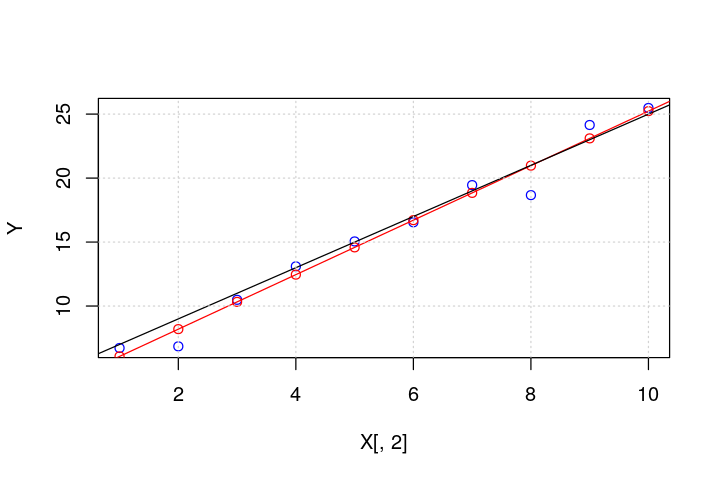

In [31]:
est_Y <- X %*% est_beta
plot(X[,2],Y,col="blue")
points(X[,2],est_Y,col="red")
abline(est_beta,col="red")
abline(c(5,2),col="black")


legend(1,30,legend=c("Y","Y'"),col=c("blue","red"),pch=1)
grid()
t(Y-est_Y)

In [32]:
paste("El error cuadrático medio es:",mean((Y-est_Y)^2))

[1] "El error cuadrático medio es: 0.976455302800437"

### Método en R

En R existe la función lm (linear model) que se utiliza para calcular la dependencia entre variables

In [65]:
n<-10
beta<-matrix(c(5,2),nrow = 2)
e<-rnorm(n,sd=1)
X<-matrix(c(rep(1,n),1:n),ncol = 2, byrow = F)
X
Y<-X %*% beta +e

1,1
1,2
1,3
1,4
1,5
1,6
1,7
1,8
1,9
1,10


In [66]:
datos <- data.frame(Y=Y,X=X[,2])
head(datos)

Y,X
<dbl>,<dbl>
6.769137,1
7.209057,2
10.310036,3
12.235681,4
13.921109,5
17.652910,6


In [67]:
beta

5
2


In [68]:
model <- lm(data=datos, formula= Y ~ X)
summary(model)


Call:
lm(formula = Y ~ X, data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0677 -0.4535 -0.1344  0.4097  1.1418 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.14843    0.53516   7.752 5.48e-05 ***
X            2.06418    0.08625  23.933 9.90e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7834 on 8 degrees of freedom
Multiple R-squared:  0.9862,	Adjusted R-squared:  0.9845 
F-statistic: 572.8 on 1 and 8 DF,  p-value: 9.899e-09


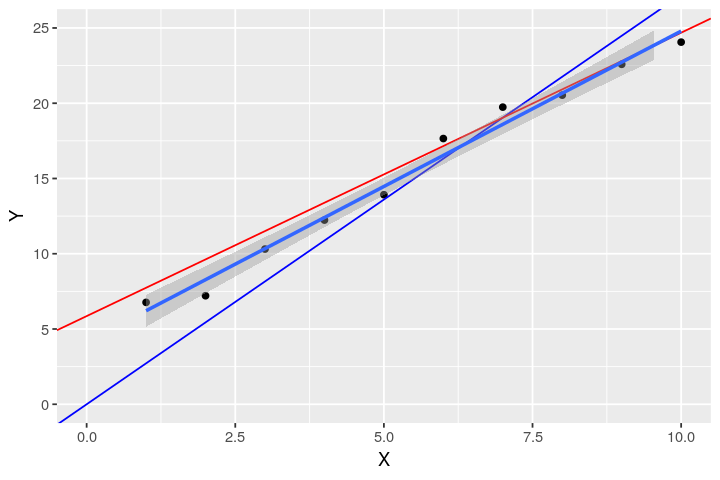

In [69]:
library(ggplot2)
ggplot(datos,aes(x=X,y=Y))+geom_point()+
    geom_abline(intercept = 0,slope = 2.72,color="blue")+
    geom_abline(intercept = 5.8585,slope = 1.8828,color="red")+ylim(c(0,25))+xlim(c(0,10))+
    geom_smooth(method="lm")

In [55]:
model$coefficients

(Intercept)           X 
   5.858453    1.882764

## Fiabilidad de los coeficientes

Suponiendo que los residuos siguen una distribución gaussiana, se puede calcular la varianza de cada uno de los coeficientes como:
\\[
Var [ \beta' | X ] = s^2 (X^TX)^{-1} = \frac{\varepsilon^2}{n-p} ·  (X^TX)^{-1} = \frac{\sum(Y_i-Y')^2}{n-p} ·  (\sum(X_i-\overline{X}) )^{-1}
\\]

Donde:
* p es el número de grados de liberdad, de coeficientes, en este caso son 2: Intersección y la pendiente.
* n es el número de muestras

La media de los coeficientes vienen dados por el vector $\beta'$. Con la media y la varianza podemos calcular la probabilidad de que el valor de la media estimado esté muy desviado de 0 por puro azar. Eso aparece con el valor Pr(>|t|) en el summary del modelo. Cuanto menos sea este valor más fiable será. Más adelante veremos que significa esta probabilidad en detalle, llamada p-valor.


In [70]:
vcov_matrix<-as.numeric(t(model$residuals)%*%model$residuals/(length(model$residuals)-2))*solve(t(X)%*%X)
# vcov_matrix <- vcov(model)
# 1/sum((X[,2]-colMeans(X)[2])^2) == solve(t(X)%*%X)[2,2]

paste("p-valor para intersección:",(1-pt(model$coefficients[1]/sqrt(diag(vcov_matrix))[1],8))*2)
paste("p-valor para pendiente:",(1-pt(model$coefficients[2]/sqrt(diag(vcov_matrix))[2],8))*2)

[1] "p-valor para intersección: 5.47521880100987e-05"

[1] "p-valor para pendiente: 9.89888304658848e-09"

In [71]:
vcov_matrix

0.28639726,-0.04091389
-0.04091389,0.00743889


Podemos calcular el margen de error para la intersección conociendo su desviación típica y que sigue una distribución t-student.

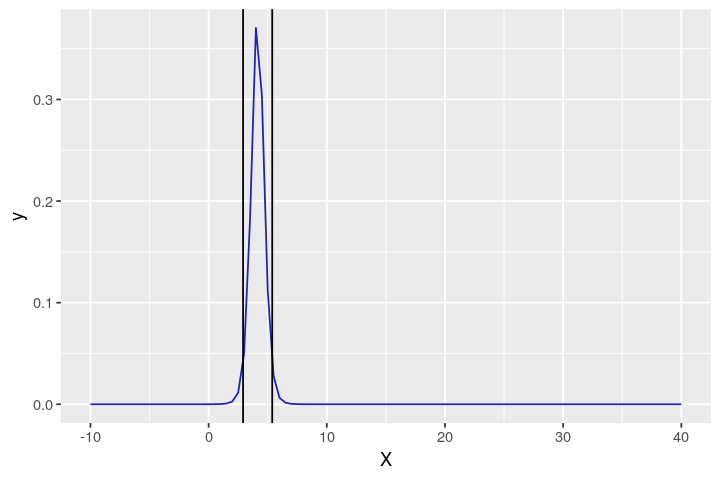

In [72]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

mydt<-function(x,df,mn,sd){
    dt((x-mn)/sd,df)
    #dnorm(x,mean=mn,sd=sd)
}
df<-n-2

ggplot(data=datos, aes(x=X)) +     
    stat_function(fun=mydt,args = list(df = df,mn=model$coefficients[1],sd=sqrt(diag(vcov_matrix))[1]),color="#2222BB")+
    geom_vline(xintercept=qt(0.975,df)*sqrt(diag(vcov_matrix))[1]+model$coefficients[1])+
    geom_vline(xintercept=qt(0.025,df)*sqrt(diag(vcov_matrix))[1]+model$coefficients[1])+
    xlim(-10,40)

Con R podemos calcular esto automáticamente mediante el comando *confint*:

In [73]:
cnf_int<-confint(model)
cnf_int

,2.5 %,97.5 %
(Intercept),2.914349,5.382516
X,1.865287,2.263068


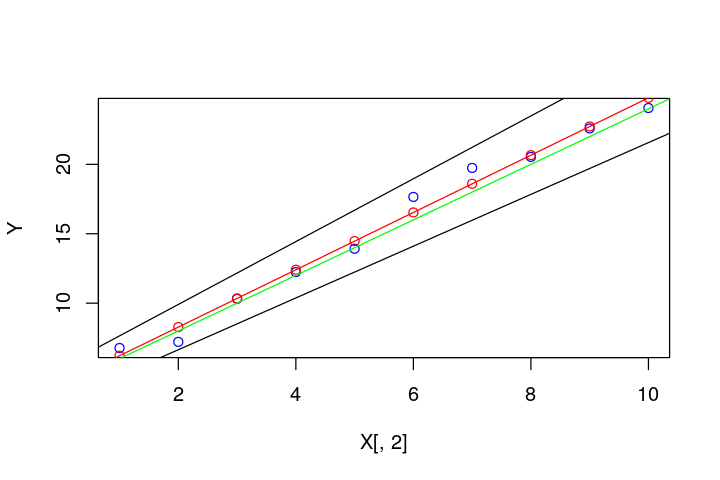

In [74]:
est_Y <- X %*% model$coefficients
plot(X[,2],Y,col="blue")
points(X[,2],est_Y,col="red")
abline(model$coefficients,col="red")
abline(c(cnf_int[1,2],cnf_int[2,2]),col="black")
abline(c(cnf_int[1,1],cnf_int[2,1]),col="black")

abline(c(4,2),col="green")

## Coeficiente de determinación $R^2$


Proporciona una medida de como de bien nuestra medida sigue al modelo. Se calcula mediante:

\\[
R^2=1-\frac{SS_{res}}{SS_{tot}}
\\]

Donde $SS_{res}$ es la suma del cuadrado de los residuos:
\\[
SS_{res}=\sum_i (y_i-y_i')^2
\\]

y $SS_{tot}$ es proporcional a la varianza de $Y$:

\\[
SS_{tot}=\sum_i (y_i-\bar{y})^2
\\]

Cuanto más cercano a $1$ mejor seguirá la predicción a los datos reales.

In [75]:
Rsq <- 1-(sum((Y-est_Y)^2))/(sum((Y-mean(Y))^2))
print(paste("El coeficiente de determinación es:",Rsq))

[1] "El coeficiente de determinación es: 0.986225359535311"


In [76]:
summary(model)


Call:
lm(formula = Y ~ X, data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0677 -0.4535 -0.1344  0.4097  1.1418 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.14843    0.53516   7.752 5.48e-05 ***
X            2.06418    0.08625  23.933 9.90e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7834 on 8 degrees of freedom
Multiple R-squared:  0.9862,	Adjusted R-squared:  0.9845 
F-statistic: 572.8 on 1 and 8 DF,  p-value: 9.899e-09


Nuevo ejemplo:

[1] 0.3698795

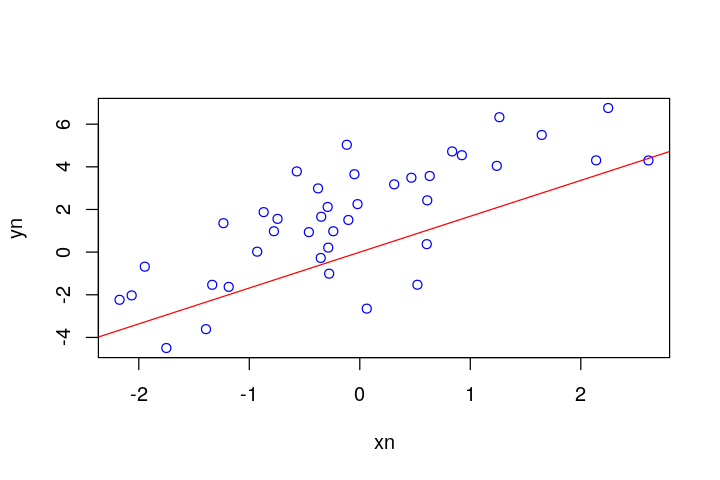

In [82]:
options(repr.plot.height=4,repr.plot.width=6)
n<-40
xn<-rnorm(n,sd=1)
yn<-xn*2+rnorm(n,mean=2,sd=2)
datos<-data.frame(y=yn,X=xn)
model=lm(datos, formula=y~X+0)


plot(xn,yn,col="blue")
abline(c(0,model$coefficients),col="red")
summary(model)$r.squared

In [83]:
summary(model)


Call:
lm(formula = y ~ X + 0, data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7556  0.7019  2.1027  2.8528  5.2319 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
X   1.6825     0.3516   4.785 2.46e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.538 on 39 degrees of freedom
Multiple R-squared:  0.3699,	Adjusted R-squared:  0.3537 
F-statistic: 22.89 on 1 and 39 DF,  p-value: 2.465e-05


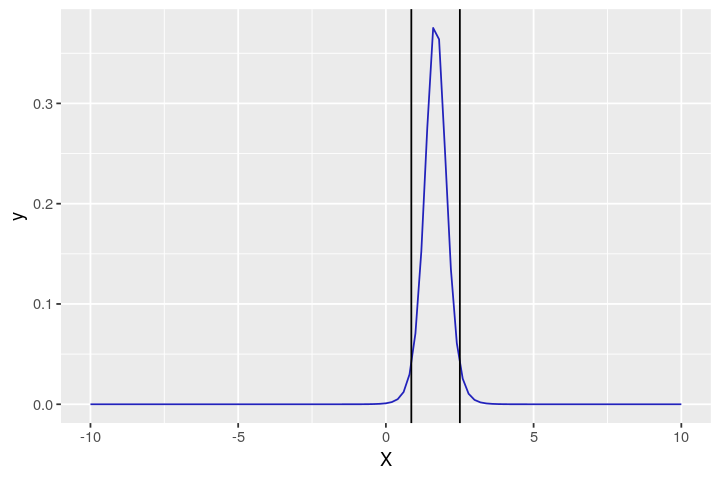

In [84]:
vcov_matrix<-as.numeric(t(model$residuals)%*%model$residuals/(length(model$residuals)-2))*solve(t(xn)%*%xn)


ggplot(data=datos, aes(x=X)) +     
    stat_function(fun=mydt,args = list(df = df,mn=model$coefficients[1],sd=sqrt(diag(vcov_matrix))[1]),color="#2222BB")+
    geom_vline(xintercept=qt(0.975,df)*sqrt(diag(vcov_matrix))[1]+model$coefficients[1])+
    geom_vline(xintercept=qt(0.025,df)*sqrt(diag(vcov_matrix))[1]+model$coefficients[1])+
    xlim(-10,10)

In [85]:
cnf_int<-confint(model)
cnf_int

,2.5 %,97.5 %
X,0.9712372,2.393785


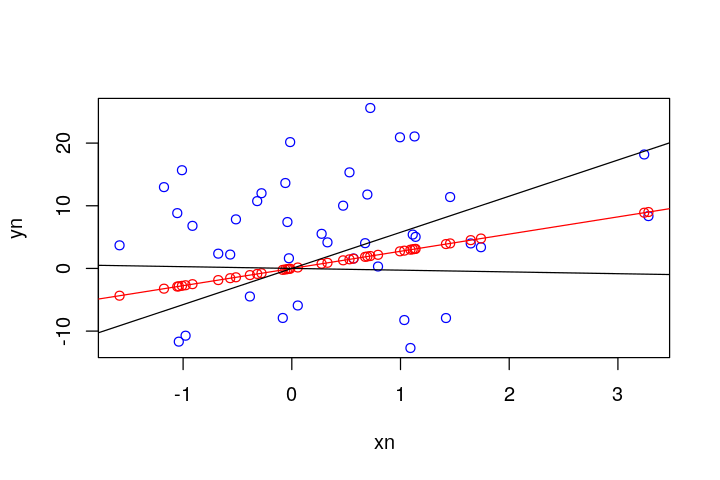

In [81]:
est_Y <- predict(model,datos)
plot(xn,yn,col="blue")
points(xn,est_Y,col="red")
abline(c(0,model$coefficients),col="red")
abline(c(0,cnf_int[2]),col="black")
abline(c(0,cnf_int[1]),col="black")

Relacionado: https://xkcd.com/1725/

### Ejemplo: Evolución de la producción de cereales por hectárea en Italia

El siguiente gráfico muestra como ha evolucionado la producción de cereales por hectarea cultivada en italia desde 1960 hasta la actualidad.

Alrededor del mundo se observa una tendencia muy parecida a partir de los años 60, nuevas especies híbridas de cereales junto con nuevos fertilizantes químicos y pesticidas, aumentarion la producción agrícola en todo el mundo en lo que se acabó llamando la revolución verde. El padre de este movimiento es considerado Normal Borlaug, premio nobel de la paz en 1970.
![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Norman_Borlaug.jpg/220px-Norman_Borlaug.jpg)




In [2]:
library(ggplot2)
yieldKgIt<-read.csv("data/yieldKgIt.csv")

head(yieldKgIt)


X,DATE,yieldCereal
<int>,<int>,<dbl>
2,1961,2181.5
3,1962,2225.3
4,1963,2115.2
5,1964,2243.0
6,1965,2399.3
7,1966,2399.8


In [5]:
model <- lm(data=yieldKgIt, formula=yieldCereal~DATE)
summary(model)
yieldKgIt$predicted <- predict(model, yieldKgIt)


Call:
lm(formula = yieldCereal ~ DATE, data = yieldKgIt)

Residuals:
    Min      1Q  Median      3Q     Max 
-723.70 -114.47  -14.89  136.04  495.01 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.302e+05  3.910e+03  -33.29   <2e-16 ***
DATE         6.750e+01  1.967e+00   34.31   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 225.3 on 52 degrees of freedom
Multiple R-squared:  0.9577,	Adjusted R-squared:  0.9569 
F-statistic:  1177 on 1 and 52 DF,  p-value: < 2.2e-16


In [6]:
head(yieldKgIt)

X,DATE,yieldCereal,predicted
<int>,<int>,<dbl>,<dbl>
2,1961,2181.5,2195.874
3,1962,2225.3,2263.374
4,1963,2115.2,2330.875
5,1964,2243.0,2398.376
6,1965,2399.3,2465.876
7,1966,2399.8,2533.377


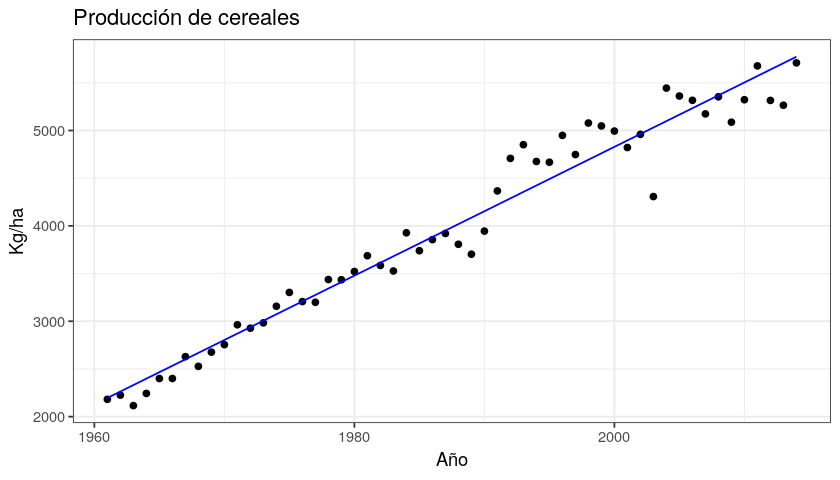

In [11]:
options(repr.plot.height=4,repr.plot.width=7)

ggplot(data=yieldKgIt,aes(x=DATE))+
   geom_point(aes(y=yieldCereal))+
#geom_smooth(method="lm",aes(y=yieldCereal))+
   geom_line(aes(y=predicted),color="blue")+
   theme_bw()+xlab("Año")+ylab("Kg/ha")+ggtitle("Producción de cereales")

Cada año, de media, la producción de cereales aumenta en 67.5kg/ha, sigue una curva lineal con bastante poco error. En la siguiente gráfica se ve los residuos:

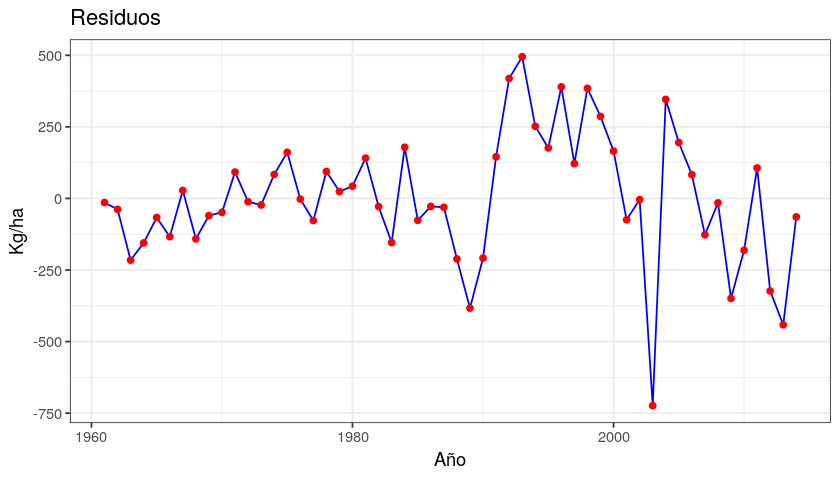

In [12]:
ggplot(data=yieldKgIt,aes(x=DATE,y=yieldCereal-predicted))+   
   geom_line(color="blue")+
   geom_point(color="red")+
   theme_bw()+xlab("Año")+ylab("Kg/ha")+ggtitle("Residuos")


¿Porqué a veces la producción de cereales es inferior o superior con la curva esperada?
¿Podría haber factores meteorológicos involucrados?

No tenemos el histórico de meteorología de toda italia, pero podemos aproximarlo con el histórico de la ciudad de Bolonia.


In [13]:
residuals<-data.frame(DATE=yieldKgIt$DATE,res=model$residuals)
weather<-read.csv("data/ITE00100550.csv")
wc<-merge(weather[,c("DATE","PRCP")],residuals,by="DATE")
cor(wc$PRCP,wc$res,use="complete.obs")
#ggplot(wc,aes(x=DATE,y=PRCP))+geom_point()

[1] 0.1847833

# Regresión lineal múltiple

Hasta ahora habíamos visto como el cambio en una variable puede afectar a otra, pero ¿qué ocurre si son varias las variables que alteran el comportamiento de nuestra variable objetivo? En este caso necesitamos utilizar la regresión lineal múltiple.

Es un modelo matemático usado para aproximar la relación de dependencia entre una variable dependiente $Y$, las variables independientes $X_i$ y un término aleatorio $\varepsilon$. Este modelo puede ser expresado como:

\\[
Y=\beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p+\varepsilon = \sum \beta_k X_k+\varepsilon
\\]


donde:
* $Y$: variable dependiente
* $X_1,X_2,\cdots ,X_p$: variables independientes
* $\beta_0, \beta_1,\beta_2,\cdots ,\beta_p$: parámetros a determinal que dado un $X_k$ produce el mejor posible $Y$
* $\varepsilon$: error, valor aleatorio.

Condiciones para aplicarlo:
1. Que la relación entre las variables sea lineal.
2. Que los errores en la medición de $X_k$ sean independientes entre sí.
3. Que los errores tengan varianza constante.
4. Que los errores tengan una media aritmética igual a cero.


Para calcular el valor óptimo de $\beta$ vamos a utilizar un poco de álgebra linea. 
\\[
\begin{split}
y_1 &=\beta_1 x_{11}+\beta_2 x_{12}+\beta_3 x_{13}+\cdots+\beta_p x_{1p}+\varepsilon_1  \\
y_2 &=\beta_1 x_{21}+\beta_2 x_{22}+\beta_3 x_{23}+\cdots+\beta_p x_{2p}+\varepsilon_1  \\
\vdots& \\
y_n &=\beta_1 x_{n1}+\beta_2 x_{n2}+\beta_3 x_{n3}+\cdots+\beta_p x_{np}+\varepsilon_1  \\
\end{split}
\\]

Podemos escribirlo en forma de matriz:
\\[
\begin{bmatrix}
 y_1 \\ 
 y_2 \\ 
 \vdots \\ 
 y_n 
\end{bmatrix}
=
\begin{bmatrix}
 x_{11} & x_{12} & x_{13} & \cdots & x_{1p} \\ 
 x_{21} & x_{22} & x_{23} & \cdots & x_{2p} \\ 
 \vdots & & & \ddots & \vdots \\ 
 x_{n1} & x_{n2} & x_{n3} & \cdots & x_{np}
\end{bmatrix}
\begin{bmatrix}
\beta_1 \\ 
\beta_2 \\
\beta_3 \\
\vdots  \\
\beta_p
\end{bmatrix}+
\begin{bmatrix}
 \varepsilon_1 \\ 
 \varepsilon_2 \\ 
 \vdots \\ 
 \varepsilon_n
\end{bmatrix}
\\]
Lo que se puede simplificar como:
\\[
Y=X \beta+\varepsilon
\\]

Al igual que en el caso anterior podemos estimar $\beta$ con:
\\[
\beta=\left( X^{\intercal}X  \right)^{-1} X^{\intercal} Y
\\]

In [14]:
n<-10
x1<-rep(1,n)
x2<-seq(2,to=11,length.out = n)
x3<-seq(0.3,to=5,length.out = n)^2
X<-matrix(c(x1,x2,x3),nrow=n,byrow = F)
print("El valor de la matriz X es:")
X
beta<-matrix(c(5,2,14),nrow=3)
print("El valor de la matriz Y es:")
Y<-X %*% beta+rnorm(n)
Y

[1] "El valor de la matriz X es:"


1,2,0.0900000
1,3,0.6760494
1,4,1.8075309
1,5,3.4844444
1,6,5.7067901
1,7,8.4745679
1,8,11.7877778
1,9,15.6464198
1,10,20.0504938
1,11,25.0000000


[1] "El valor de la matriz Y es:"


9.354567
19.946050
39.313052
64.374012
97.273153
137.903906
185.346412
242.974383
306.040862
376.440651


In [15]:
print("El valor estimado de beta es:")
est_beta<-solve(t(X) %*% X) %*% t(X) %*% Y
est_beta

print("El valor real de beta es:")
beta

[1] "El valor estimado de beta es:"


3.277792
2.542640
13.814293


[1] "El valor real de beta es:"


5
2
14


Esto también se puede resolver con la función *lm* de R. Ignoramos el vector *x1* porque la función por defecto ya añade el término.

In [18]:
lm(Y~x2+x3)


Call:
lm(formula = Y ~ x2 + x3)

Coefficients:
(Intercept)           x2           x3  
      3.278        2.543       13.814  


### Ejemplo: Peso de los niños al nacer

Este dataset contien información de bebes recien nacidos y sus padres. Podemos usarlo como regresión para ver cuales son los factores que más afectan al peso del niño.

http://people.reed.edu/~jones/141/BirthWgt.html

Tenemos las siguientes variables que vamos a utilizar:

|Nombre|Variable|
|-|-|
|Birthweight| Peso al nacer (libras)|
|Gestation| Semanas que duró la gestación|
|motherage| Edad de la madre|
|mnocig| Número de cigarros al día fumados por la madre|
|mheight| Altura de la madre (pulgadas)|


In [21]:
bwt<-read.csv("data/birthweight_reduced.csv")
#str(bwt)
model<-lm(data=bwt, formula = Birthweight ~ Gestation+motherage+mnocig+mheight)
summary(model)


Call:
lm(formula = Birthweight ~ Gestation + motherage + mnocig + mheight, 
    data = bwt)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.75980 -0.66076 -0.09069  0.60934  1.62597 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -14.42495    3.83972  -3.757 0.000592 ***
Gestation     0.33062    0.05407   6.115 4.38e-07 ***
motherage     0.01541    0.02610   0.591 0.558404    
mnocig       -0.02613    0.01199  -2.180 0.035673 *  
mheight       0.13329    0.05689   2.343 0.024627 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8904 on 37 degrees of freedom
Multiple R-squared:  0.5954,	Adjusted R-squared:  0.5517 
F-statistic: 13.61 on 4 and 37 DF,  p-value: 6.448e-07


Los valores que más influencia parecen tener son aquellos que presentan un pvalor (Pr) más bajo. El número de * que hay a la derecha de cada fila indica su grado de confianza.

La variable que más parece influir es la gestación, parece que por cada semana de gestación el bebé gana 0.33062 libras de peso. En cambio por cada cigarro al día que fuma la madre el peso del bebé podría disminuir en 0.02613 libras. La altura de la madre también parece tener cierta incluencia, por cada pulgada más que mida la madre el bebé pesará 0.13329 libras más. En cambio la edad de la madre parece no tener ningún efecto estadístico significativo.

In [22]:
model<-lm(data=bwt, formula = Birthweight ~ Gestation+mnocig+mheight)
summary(model)


Call:
lm(formula = Birthweight ~ Gestation + mnocig + mheight, data = bwt)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.51576 -0.65149 -0.04835  0.56673  1.72081 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -14.02601    3.74731  -3.743 0.000601 ***
Gestation     0.33058    0.05360   6.167 3.35e-07 ***
mnocig       -0.02374    0.01118  -2.123 0.040351 *  
mheight       0.13289    0.05640   2.356 0.023727 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8827 on 38 degrees of freedom
Multiple R-squared:  0.5916,	Adjusted R-squared:  0.5594 
F-statistic: 18.35 on 3 and 38 DF,  p-value: 1.6e-07


In [23]:
confint(model)

,2.5 %,97.5 %
(Intercept),-21.61203867,-6.439988997
Gestation,0.22207108,0.439087856
mnocig,-0.04638373,-0.001099777
mheight,0.01870990,0.247064970


## Estimación de funciones polinómicas

Podemos estimar funciones polinómicas del tipo:
\\[
y_i=\beta_0+\beta_1·x_i·+\beta_2·x_i^2+\beta_3·x_i^3+\cdots+\beta_p·x_i^p
\\]


Simplemente reescribiendolo como un modelo lineal múltple
\\[
\begin{bmatrix}
 y_1 \\ 
 y_2 \\ 
 \vdots \\ 
 y_n 
\end{bmatrix}
=
\begin{bmatrix}
 1 & x_{1} & x_{1}^2 & x_{1}^3 & \cdots & x_{1}^p \\ 
 1 & x_{2} & x_{2}^2 & x_{2}^3 & \cdots & x_{2}^p \\ 
 \vdots & & & \ddots & \vdots \\ 
 1 & x_{n} & x_{n}^2 & x_{n}^3 & \cdots & x_{n}^p
\end{bmatrix}
\begin{bmatrix}
\beta_0 \\ 
\beta_1 \\
\beta_2 \\
\beta_3 \\
\vdots  \\
\beta_p
\end{bmatrix}+
\begin{bmatrix}
 \varepsilon_1 \\ 
 \varepsilon_2 \\ 
 \vdots \\ 
 \varepsilon_n
\end{bmatrix}
\\]
Lo que se puede simplificar como:
\\[
Y=X \beta+\varepsilon
\\]


[1] "El valor estimado de beta es:"


0.9242762
0.6546969
2.8336904
0.5154970


[1] "El valor real de beta es:"


1.0
1.0
3.0
0.5


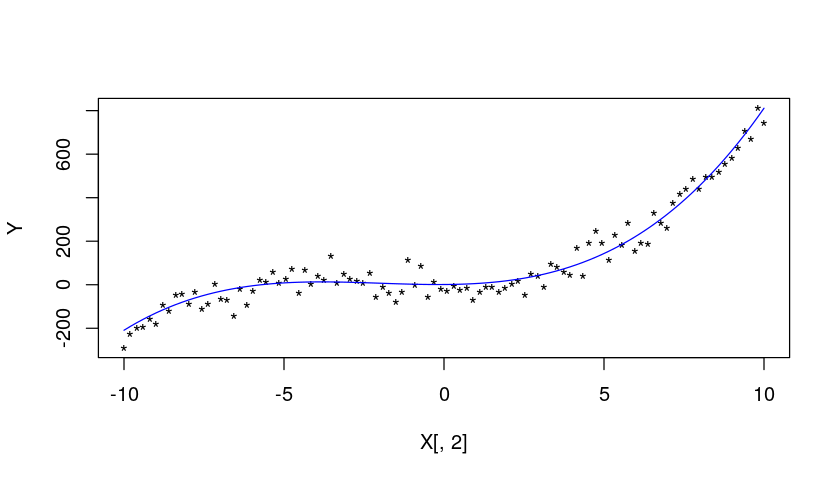

In [24]:
n<-100
x<-seq(-10,10,length.out = n)

x0<-rep(1,n)
x1<-x
x2<-x^2 
x3<-x^3
X<-matrix(c(x0,x1,x2,x3),nrow=n,byrow = F)

beta<-matrix(c(1,1,3,0.5),nrow=4)
Y<-X %*% beta+rnorm(n,sd = 50)

plot(X[,2],Y,pch='*')

est_beta<-solve(t(X) %*% X) %*% t(X) %*% Y
est_Y<-X %*% beta
lines(X[,2],est_Y,col="blue")

print("El valor estimado de beta es:")
est_beta

print("El valor real de beta es:")
beta

In [25]:
modelPoly3<-lm(Y~x+I(x^2)+I(x^3))
modelPoly3


Call:
lm(formula = Y ~ x + I(x^2) + I(x^3))

Coefficients:
(Intercept)            x       I(x^2)       I(x^3)  
     0.9243       0.6547       2.8337       0.5155  


In [26]:
summary(modelPoly3)


Call:
lm(formula = Y ~ x + I(x^2) + I(x^3))

Residuals:
     Min       1Q   Median       3Q      Max 
-118.150  -33.015   -6.669   34.578  123.143 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.92428    7.29212   0.127    0.899    
x            0.65470    2.08466   0.314    0.754    
I(x^2)       2.83369    0.15984  17.728   <2e-16 ***
I(x^3)       0.51550    0.03122  16.512   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 48.61 on 96 degrees of freedom
Multiple R-squared:  0.9559,	Adjusted R-squared:  0.9545 
F-statistic: 693.2 on 3 and 96 DF,  p-value: < 2.2e-16


In [27]:
summary(lm(Y~I(x^2)+I(x^3)))


Call:
lm(formula = Y ~ I(x^2) + I(x^3))

Residuals:
    Min      1Q  Median      3Q     Max 
-119.91  -32.28   -6.62   35.17  125.29 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.92428    7.25816   0.127    0.899    
I(x^2)       2.83369    0.15909  17.811   <2e-16 ***
I(x^3)       0.52448    0.01243  42.211   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 48.38 on 97 degrees of freedom
Multiple R-squared:  0.9558,	Adjusted R-squared:  0.9549 
F-statistic:  1050 on 2 and 97 DF,  p-value: < 2.2e-16


### Sobreajuste

El sobreajuste o overfitting ocurre en los modelos que tienen un grado polinómico tan alto que empiezan a seguir al ruido, se sobreajustan demasiado a los datos, perdiendo una visión más general de los datos y proporcionando predicciones peores.

En este caso en lugar de estar aprendiendo la relación básica entre dos variables estaríamos aprendiendo los errores, nuestro modelo intenta integrar los errores para dar una respuesta más exacta. El problema es que al coger otra vez variables similares los errores cambian, y lo aprendido con los errores anteriores ya no nos sirve, con lo cual nuestro modelo sería erroneo.

No hay que perderse demasiado en los detalles y las pequeñas variaciones de una variable, la esencia del modelo se basa en encontrar una predicción que funcione para la mayoría de los casos, no para los datos que estamos viendo ahora mismo, sino también para los datos futuros que nos llegarán.

In [28]:
modelOverfit <- lm(Y~poly(x,27))
summary(modelOverfit)


Call:
lm(formula = Y ~ poly(x, 27))

Residuals:
    Min      1Q  Median      3Q     Max 
-96.180 -23.538   0.885  19.899 110.775 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     97.289      4.471  21.761  < 2e-16 ***
poly(x, 27)1  1878.053     44.708  42.007  < 2e-16 ***
poly(x, 27)2   861.781     44.708  19.276  < 2e-16 ***
poly(x, 27)3   802.652     44.708  17.953  < 2e-16 ***
poly(x, 27)4   -93.911     44.708  -2.101  0.03919 *  
poly(x, 27)5   -50.285     44.708  -1.125  0.26444    
poly(x, 27)6    33.504     44.708   0.749  0.45607    
poly(x, 27)7    89.997     44.708   2.013  0.04786 *  
poly(x, 27)8  -103.720     44.708  -2.320  0.02318 *  
poly(x, 27)9     1.131     44.708   0.025  0.97988    
poly(x, 27)10   14.084     44.708   0.315  0.75365    
poly(x, 27)11  -15.276     44.708  -0.342  0.73359    
poly(x, 27)12   74.507     44.708   1.667  0.09996 .  
poly(x, 27)13  -47.230     44.708  -1.056  0.29432    
poly(x, 27)14 -133.685     44

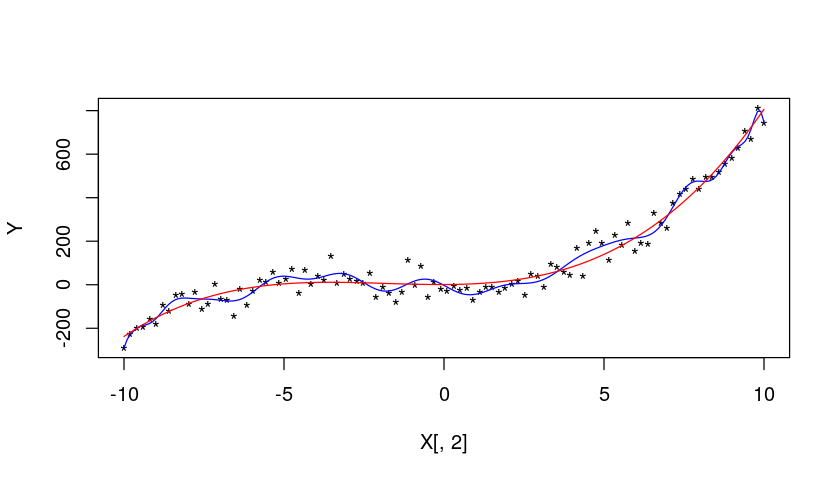

In [29]:
plot(X[,2],Y,pch='*')

xp<-seq(-10,10,by=0.1)
yp<-predict(modelOverfit,data.frame(x=xp))
lines(xp,yp,col="blue")
lines(xp,predict(modelPoly3,data.frame(x=xp)),col="red")

In [30]:
paste("Polinomio grado 27: Rsquared:",summary(modelOverfit)$r.squared)
paste("Polinomio grado 27: Residual standard error",sqrt(sum(summary(modelOverfit)$residuals^2)/(length(summary(modelOverfit)$residuals)-25)))

paste("Polinomio grado 3: Rsquared:",summary(modelPoly3)$r.squared)
paste("Polinomio grado 3: Residual standard error",sqrt(sum(summary(modelPoly3)$residuals^2)/(length(summary(modelPoly3)$residuals)-4)))



[1] "Polinomio grado 27: Rsquared: 0.972005241057757"

[1] "Polinomio grado 27: Residual standard error 43.8051257059721"

[1] "Polinomio grado 3: Rsquared: 0.95587456254352"

[1] "Polinomio grado 3: Residual standard error 48.6100527111902"

### Como encontrar el mejor modelo


Podemos usar el p-valor de los coeficientes o buscar entre todos los modelos el de menor AIC.

El criterio de información de Akaike (AIC) es un estimador de la calidad relativa del modelo que tiene en cuenta su complejidad.

A medida que se aumenta el número de parámetros de entrada o de grados de un polinomio el valor de $R^2$ va a ser mejor porque el error cuadrático medio disminuye. El AIC penaliza los modelos complejos en favor del los sencillos para evitar el sobreajuste.

\\[
AIC = 2·P+N·log\left(\frac{SS_{res}}{N}\right) = 2·P + N·log \left(\frac{\sum_i (y_i-y_i')^2}{N} \right)
\\]

Donde $P$ es el número de variables que se utilizan en el modelo y $N$ el número de muestras.





In [31]:
paste("Polinomio grado 27, AIC:",AIC(modelOverfit))
paste("Polinomio grado 3, AIC:",AIC(modelPoly3))

[1] "Polinomio grado 27, AIC: 1068.96966655295"

[1] "Polinomio grado 3, AIC: 1066.47157827412"

En R existe la función stepAIC que nos encuentra el AIC mínimo tras probar con diferentes combinaciones.

In [32]:
library(MASS)
datadf<-data.frame(y=Y,x=x)
model<-lm(formula=y~x+I(x^2)+I(x^3)+I(x^4)+I(x^5)+I(x^6)+I(x^7)+I(x^8),datadf)
stepAIC(model,trace=FALSE)


Call:
lm(formula = y ~ x + I(x^2) + I(x^3) + I(x^4) + I(x^5) + I(x^6) + 
    I(x^7) + I(x^8), data = datadf)

Coefficients:
(Intercept)            x       I(x^2)       I(x^3)       I(x^4)       I(x^5)  
 -2.514e+01   -1.001e+01    8.792e+00    1.326e+00   -2.586e-01   -1.569e-02  
     I(x^6)       I(x^7)       I(x^8)  
  3.975e-03    8.772e-05   -2.004e-05  



Call:
lm(formula = Y ~ I(x^2) + I(x^3) + I(x^7))

Coefficients:
(Intercept)       I(x^2)       I(x^3)       I(x^7)  
  9.243e-01    2.834e+00    5.477e-01   -3.515e-06  


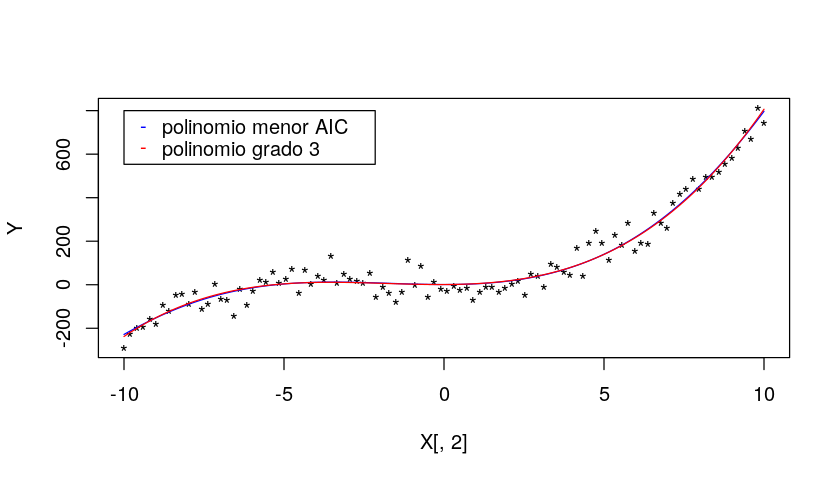

In [33]:
modelOptim<-lm(Y~I(x^2) + I(x^3) + I(x^7))
modelOptim
plot(X[,2],Y,pch='*')

xp<-seq(-10,10,by=0.1)
yp<-predict(modelOptim,data.frame(x=xp))
lines(xp,yp,col="blue")

modelPoly3<-lm(Y~x+I(x^2)+I(x^3))
lines(xp,predict(modelPoly3,data.frame(x=xp)),col="red")

legend(-10,800,c("polinomio menor AIC","polinomio grado 3"),pch='-',col=c('blue','red'),y.intersp=2)

In [34]:
summary(modelOptim)
summary(modelPoly3)


Call:
lm(formula = Y ~ I(x^2) + I(x^3) + I(x^7))

Residuals:
     Min       1Q   Median       3Q      Max 
-115.170  -31.297   -6.548   32.944  122.992 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.243e-01  7.276e+00   0.127    0.899    
I(x^2)       2.834e+00  1.595e-01  17.768   <2e-16 ***
I(x^3)       5.477e-01  3.431e-02  15.963   <2e-16 ***
I(x^7)      -3.515e-06  4.832e-06  -0.728    0.469    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 48.5 on 96 degrees of freedom
Multiple R-squared:  0.9561,	Adjusted R-squared:  0.9547 
F-statistic: 696.5 on 3 and 96 DF,  p-value: < 2.2e-16



Call:
lm(formula = Y ~ x + I(x^2) + I(x^3))

Residuals:
     Min       1Q   Median       3Q      Max 
-118.150  -33.015   -6.669   34.578  123.143 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.92428    7.29212   0.127    0.899    
x            0.65470    2.08466   0.314    0.754    
I(x^2)       2.83369    0.15984  17.728   <2e-16 ***
I(x^3)       0.51550    0.03122  16.512   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 48.61 on 96 degrees of freedom
Multiple R-squared:  0.9559,	Adjusted R-squared:  0.9545 
F-statistic: 693.2 on 3 and 96 DF,  p-value: < 2.2e-16


Aunque el error sea menor con el polinomio de grado 24, es mejor utilizar el modelo con un el polinomio de grado 3. Porque el modelo de grado 24 está aprendiendo sobre el ruido.

### Ejemplo: Evolución de la población en España

Volvamos a la distribución por edad de la población española a mediados de 2017. Podemos ver como el número de personas de más de 41 años parece ser representado más o menos por una línea:


Call:
lm(formula = Total ~ edad + I(edad^2) + I(edad^3) + I(edad^4) + 
    I(edad^5) + I(edad^6) + I(edad^7) + I(edad^8) + I(edad^9) + 
    I(edad^11), data = poblacion)

Residuals:
   Min     1Q Median     3Q    Max 
-63187  -7298   -491   8868  28361 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  2.440e+09  4.855e+09   0.503    0.617
edad        -3.267e+08  7.214e+08  -0.453    0.653
I(edad^2)    1.919e+07  4.761e+07   0.403    0.689
I(edad^3)   -6.489e+05  1.836e+06  -0.353    0.725
I(edad^4)    1.391e+04  4.574e+04   0.304    0.762
I(edad^5)   -1.960e+02  7.675e+02  -0.255    0.799
I(edad^6)    1.808e+00  8.741e+00   0.207    0.837
I(edad^7)   -1.047e-02  6.600e-02  -0.159    0.875
I(edad^8)    3.404e-05  3.070e-04   0.111    0.912
I(edad^9)   -4.485e-08  7.072e-07  -0.063    0.950
I(edad^11)  -7.306e-14  2.390e-12  -0.031    0.976

Residual standard error: 16880 on 52 degrees of freedom
Multiple R-squared:  0.9966,	Adjusted R-squared:  0.9959 
F-s

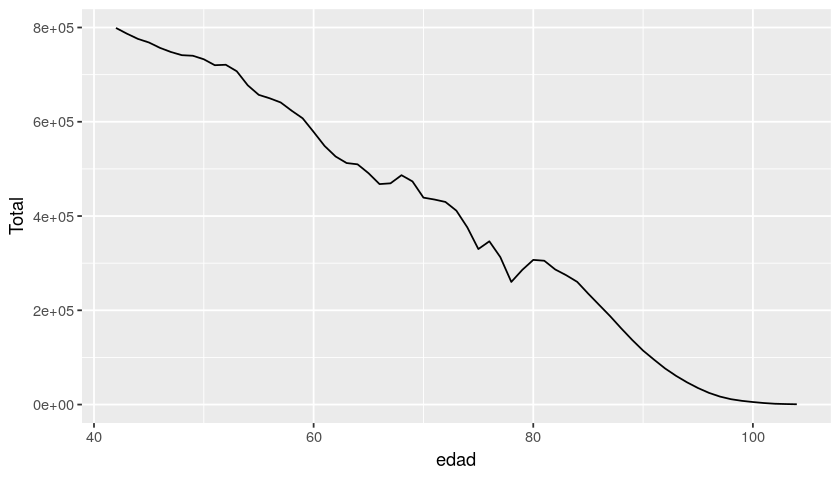

In [35]:
library(ggplot2)
poblacion<-read.csv("data/9663c.csv",skip=6,
                    fileEncoding="ISO-8859-1",header=F,col.names=c("edadTxt","Total","Hombres","Mujeres",""))
poblacion<-poblacion[1:105,c("edadTxt","Total")]
poblacion$edad<-0:104
poblacion$nacimiento<-2017-0:104
poblacion<-subset(poblacion,edad>41)

ggplot(data=poblacion,aes(x=edad,y=Total))+geom_line()

#model<-lm(data=poblacion,Total~poly(edad,8))
model<-lm(data=poblacion,Total~edad+I(edad^2)+I(edad^3)+I(edad^4)+I(edad^5)+I(edad^6)+I(edad^7)+I(edad^8)+I(edad^9)+I(edad^11))
summary(model)

In [36]:
library(MASS)
stepAIC(model,trace=FALSE)


Call:
lm(formula = Total ~ edad + I(edad^2) + I(edad^3) + I(edad^4) + 
    I(edad^5) + I(edad^6) + I(edad^7) + I(edad^8) + I(edad^9), 
    data = poblacion)

Coefficients:
(Intercept)         edad    I(edad^2)    I(edad^3)    I(edad^4)    I(edad^5)  
  2.584e+09   -3.482e+08    2.062e+07   -7.042e+05    1.530e+04   -2.192e+02  
  I(edad^6)    I(edad^7)    I(edad^8)    I(edad^9)  
  2.073e+00   -1.248e-02    4.341e-05   -6.645e-08  


In [37]:
model<-lm(data=poblacion,Total~edad+I(edad^2)+I(edad^3)+I(edad^4)+I(edad^5)+I(edad^6)+I(edad^7)+I(edad^8)+I(edad^9))
summary(model)


Call:
lm(formula = Total ~ edad + I(edad^2) + I(edad^3) + I(edad^4) + 
    I(edad^5) + I(edad^6) + I(edad^7) + I(edad^8) + I(edad^9), 
    data = poblacion)

Residuals:
   Min     1Q Median     3Q    Max 
-63194  -7390   -478   8893  28376 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  2.584e+09  1.174e+09   2.201   0.0321 *
edad        -3.482e+08  1.584e+08  -2.197   0.0324 *
I(edad^2)    2.062e+07  9.389e+06   2.196   0.0325 *
I(edad^3)   -7.042e+05  3.207e+05  -2.196   0.0325 *
I(edad^4)    1.530e+04  6.959e+03   2.198   0.0323 *
I(edad^5)   -2.192e+02  9.952e+01  -2.203   0.0320 *
I(edad^6)    2.073e+00  9.382e-01   2.210   0.0315 *
I(edad^7)   -1.248e-02  5.624e-03  -2.219   0.0308 *
I(edad^8)    4.341e-05  1.945e-05   2.231   0.0299 *
I(edad^9)   -6.645e-08  2.960e-08  -2.245   0.0290 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16720 on 53 degrees of freedom
Multiple R-squared:  0.9966,	Adjuste

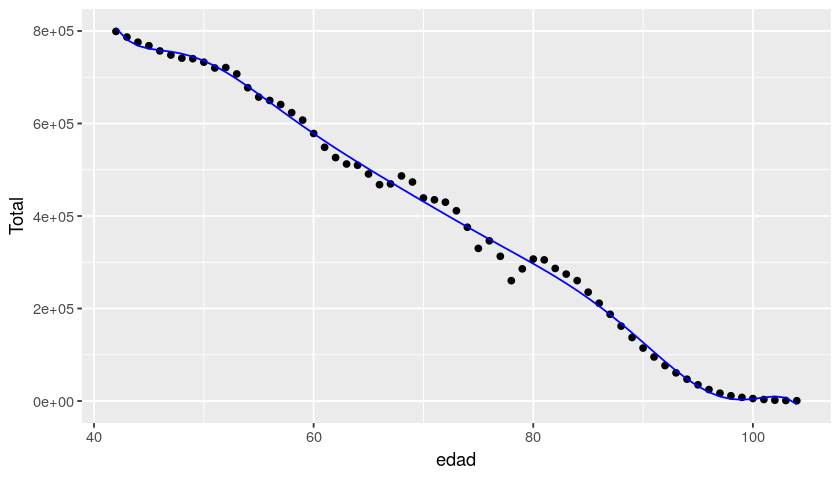

In [38]:
poblacion$predicted <- predict(model,poblacion)
ggplot(data=poblacion,aes(x=edad))+geom_point(aes(y=Total))+
 geom_line(aes(y=predicted),color="blue")


Pero si nos fijamos con detenimiento en el residuo, la diferencia entre el valor real y el esperado, podemos ver como todavía hoy se puede ver que los primero años de la postguerra hubo menos nacimientos.

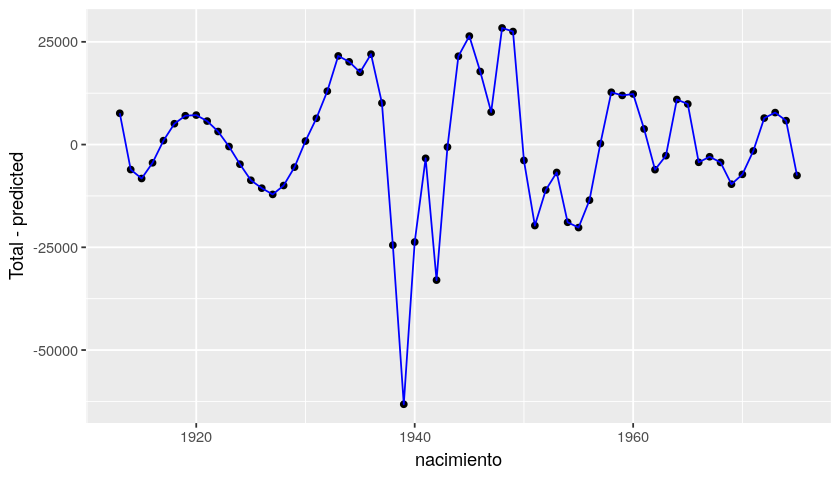

In [39]:
ggplot(data=poblacion,aes(x=nacimiento,y=Total-predicted))+geom_point(color="black")+
 geom_line(color="blue")


### Regresión con variables categóricas



Dataset de automóviles y seguros.

https://archive.ics.uci.edu/ml/datasets/Automobile

In [40]:
autos<-read.csv("./data//imports-85.data", col.names = c("risk", "normalized_losses", 
                                                         "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"))
autos<-autos[,c("price","horsepower","length","width","body_style","risk")]
autos$horsepower[autos$horsepower=="?"]<-NA
autos$horsepower<-as.numeric(autos$horsepower)
autos$price<-as.numeric(autos$price)

In [41]:
levels(autos$body_style)

[1] "convertible" "hardtop"     "hatchback"   "sedan"       "wagon"

In [42]:
aggregate(risk~body_style,autos,mean,na.rm=TRUE)

body_style,risk
<fct>,<dbl>
convertible,2.8000000
hardtop,1.8750000
hatchback,1.5857143
sedan,0.3333333
wagon,-0.1600000


In [43]:
table(autos$body_style)


convertible     hardtop   hatchback       sedan       wagon 
          5           8          70          96          25 

Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”

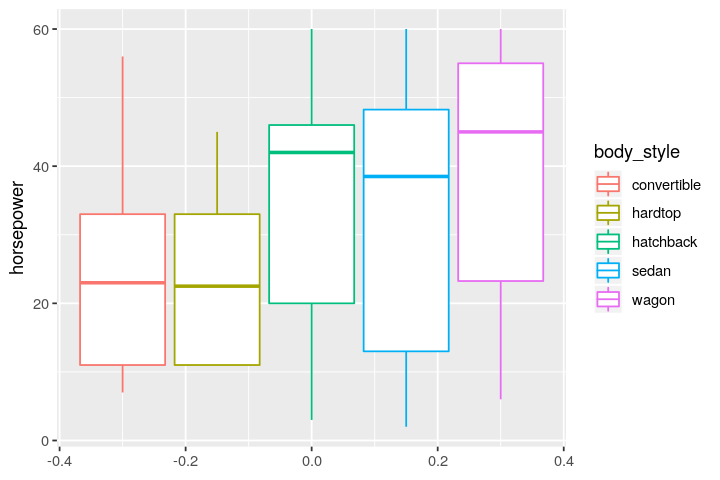

In [44]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)
ggplot(autos,aes(y=horsepower,color=body_style))+geom_boxplot()

In [45]:
model<-(lm(formula=risk ~ horsepower+body_style,data=autos))
summary(model)


Call:
lm(formula = risk ~ horsepower + body_style, data = autos)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5333 -0.5151 -0.1145  0.7599  1.8353 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          3.017807   0.452017   6.676 2.46e-10 ***
horsepower          -0.008377   0.003832  -2.186   0.0300 *  
body_stylehardtop   -0.944896   0.562116  -1.681   0.0944 .  
body_stylehatchback -1.150844   0.457701  -2.514   0.0127 *  
body_stylesedan     -2.409074   0.453005  -5.318 2.85e-07 ***
body_stylewagon     -2.854971   0.487344  -5.858 1.95e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9859 on 196 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.3846,	Adjusted R-squared:  0.3689 
F-statistic:  24.5 on 5 and 196 DF,  p-value: < 2.2e-16


In [47]:
confint(model)

,2.5 %,97.5 %
(Intercept),2.12636627,3.909247307
horsepower,-0.01593351,-0.000820862
body_stylehardtop,-2.05346808,0.163676457
body_stylehatchback,-2.05349550,-0.248192924
body_stylesedan,-3.30246328,-1.515683770
body_stylewagon,-3.81608110,-1.893860657


In [49]:
predict(model,data.frame(horsepower=20,body_style='hardtop'))
predict(model,data.frame(horsepower=20,body_style='convertible'))
        

1 
1.905367

1 
2.850263

In [48]:
predict(model,data.frame(horsepower=20,body_style='hardtop'))-
predict(model,data.frame(horsepower=20,body_style='convertible'))

1 
-0.9448958

In [52]:
model<-(lm(formula=risk ~ horsepower*body_style,data=autos))
summary(model)


Call:
lm(formula = risk ~ horsepower * body_style, data = autos)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3308 -0.3448 -0.2481  0.6619  2.1618 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     2.547409   0.753151   3.382 0.000871 ***
horsepower                      0.009715   0.024000   0.405 0.686078    
body_stylehardtop              -1.247598   1.035864  -1.204 0.229916    
body_stylehatchback             0.203473   0.795607   0.256 0.798421    
body_stylesedan                -2.228109   0.777079  -2.867 0.004603 ** 
body_stylewagon                -2.993748   0.875467  -3.420 0.000766 ***
horsepower:body_stylehardtop    0.014632   0.035819   0.408 0.683372    
horsepower:body_stylehatchback -0.043870   0.024919  -1.761 0.079913 .  
horsepower:body_stylesedan     -0.009288   0.024521  -0.379 0.705271    
horsepower:body_stylewagon     -0.002605   0.026092  -0.100 0.920585    
---
Signif. codes:  0 

# Clasificación - Regresión logística

Si lo que tenemos son dos grupos y queremos realizar una clasificación, tenemos que realizar ciertas modificaciones a la regresión lineal.




La fórmula de la regresión lineal es:
\\[
\hat{Y}=\beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p = \sum \beta_k X_k
\\]

Podemos tratar de asignar una probabilidad 

Pero hay un problema porque esta regresión va entre 


Por ejemplo: Trabajamos en un maderera y queremos saber si un tronco es de un abedul o de un abeto basándonos únicamente en el diametro y la longitud del tronco.



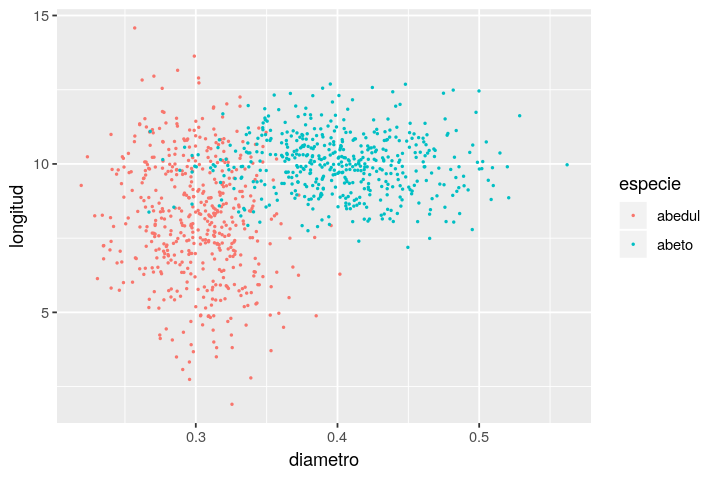

In [53]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

arboles<-read.csv("data/arboles.csv")
ggplot(arboles,aes(x=diametro,y=longitud,color=especie))+geom_point(size=0.3)

Podemos hacer una clasificación con un modelo lineal donde creamos una nueva columna *especie.n* y le asignamos:
* abeto  = 1
* abedul = -1

Utilizamos un modelo lineal tal que:
\\[
  especie = \beta_0+\beta_1·diametro+\beta_2·longitud
\\]

Entonces:
* si especie >= 0 es un abeto
* si especie <  0es un abedul

La recta que marcará el umbral será:
\\[
\begin{split}    
  0 &= \beta_0+\beta_1·diametro+\beta_2·longitud \\
  -\beta_2 longitud &= \beta_0+\beta_1·diametro\\
  longitud &= \frac{-\beta_0}{\beta_2}-\frac{\beta_1}{\beta_2}·diametro
\end{split}  
\\]



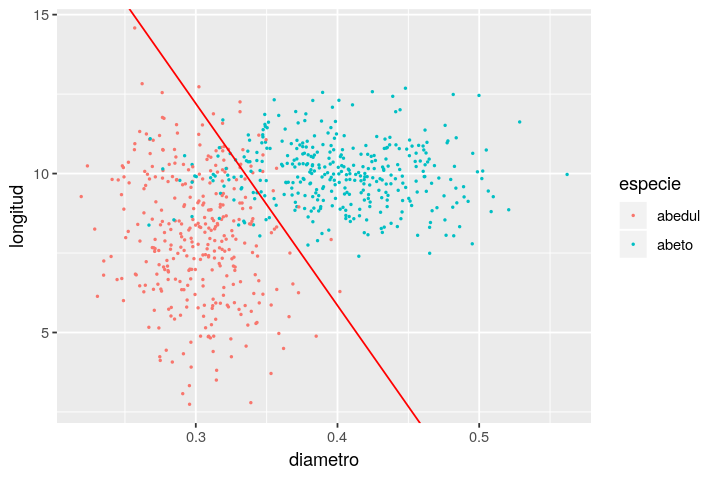

In [54]:
arboles$especie.n[arboles$especie=="abeto"] <-   1
arboles$especie.n[arboles$especie=="abedul"]<-  -1

itrain<-sample(1:nrow(arboles),round(nrow(arboles)*0.7))
arboles.train<-arboles[itrain,]
arboles.test<-arboles[-itrain,]


modellm<-lm(data=arboles.train,formula=especie.n~diametro+longitud)
beta<-modellm$coefficients

ggplot(arboles.train,aes(x=diametro,y=longitud,color=especie))+geom_point(size=0.3)+
 geom_abline(intercept = -beta[1]/beta[3],slope = -beta[2]/beta[3], color="red" )

Pero esto no es del todo correcto porque los datos **NO** siguen una distribución gaussiana. 
Cada iteración, cada línea del dataframe, cada árbol medido, podría seguir una distribución de bernoulli.
Es un abeto con probabilidad p o es un abedul con probabilidad (1-p). Esto se puede generalizar con una distribución binomial que indique la probabilidad de que n troncos sean abedules.


Para pasar del dominio de números reales $(-\infty,\infty)$ al de probabilidades $[0,1]$ a vamos a utilizar la **función logística**:
\\[
h(x) = \frac{1}{1+e^{-x}}
\\]
Su inversa se conoce como la función **logit**:
\\[
h^{-1}(p) = log \left( \frac{p}{1-p} \right)
\\]

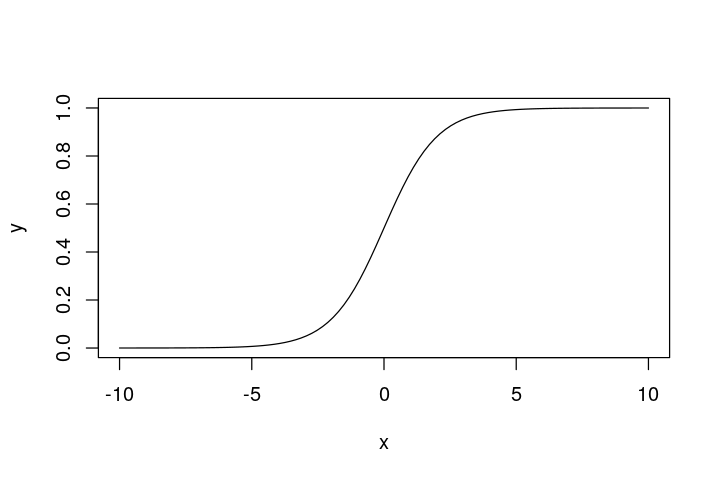

In [55]:
x<-seq(-10,10,length.out = 100)
y<-1/(1+exp(-x))
plot(x,y,t="l")

Es decir, tenemos una probabilidad, su valor está en el rango $[0,1]$:
\\[
    p = \frac{1}{1-e^{-\hat{Y}}}= \frac{1}{1-e^{-(\beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p)}}   
\\]

Definimos la razón de monomios (Odds ratio) como el cociente entre dos probabilidades, su valor está en el rango $[0,\infty]$:
\\[
 Odds = \frac{p}{1-p}=\frac{\frac{1}{1-e^{-(\beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p)}}}{\frac{e^{-(\beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p)}}{1-e^{-(\beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p)}}}=e^{(\beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p)}
\\]

Si aplicamos el logaritmo a la razón de monomios tenemos un valor que está en el rango $[-\infty,\infty]$:
\\[
 log(Odds) = \beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p
\\]



Podemos repetir el ejercicio de antes poniendo el umbral en 0 igualmente pero con regresión logística:

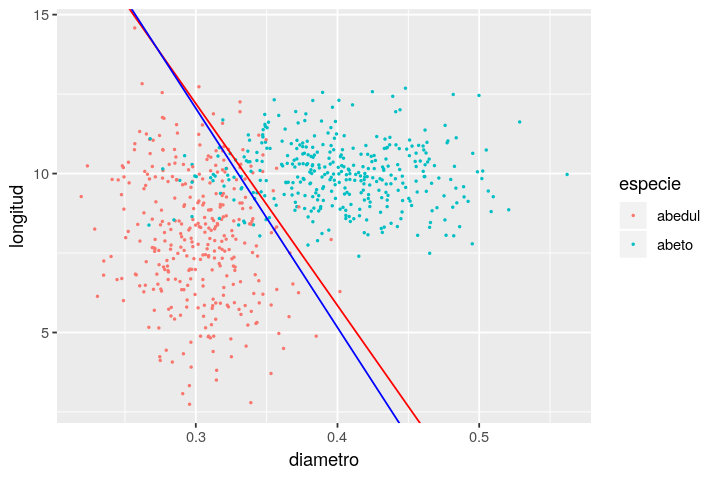

In [56]:
model<-glm(data=arboles.train,formula=especie~diametro+longitud,family=binomial(link='logit'))
betalg<-model$coefficients

ggplot(arboles.train,aes(x=diametro,y=longitud,color=especie))+geom_point(size=0.3)+
 geom_abline(intercept = -beta[1]/beta[3],slope = -beta[2]/beta[3], color="red" )    +
 geom_abline(intercept = -betalg[1]/betalg[3],slope = -betalg[2]/betalg[3], color="blue" )    

## Matriz de confusión

Aqui lo que tenemos es un clasificador con dos hipótesis $H_0$ y $H_1$. 
Si nuestro test estadístico dice que la hipótesis $H_1$ es cierta pero en realidad la que es cierta es la hipótesis $H_0$ estaremos cometiendo un error.
El tipo de error depende de si nos hemos equivocado prediciendo $H_0$ o $H_1$.

|.|$H_0$ cierta|$H_1$ cierta|
|-|-|-|
|Elegimos $H_0$| No hay error |Error tipo II, falso negativo|
|Elegimos $H_1$| Error tipo I, falso positivo| No hay error |


La matriz de confusión lo que hace es contar el número de ocurrencias que ha habido en cada celda:


140,4
24,132


        
y_est    abedul abeto
  abedul    140     4
  abeto      24   132

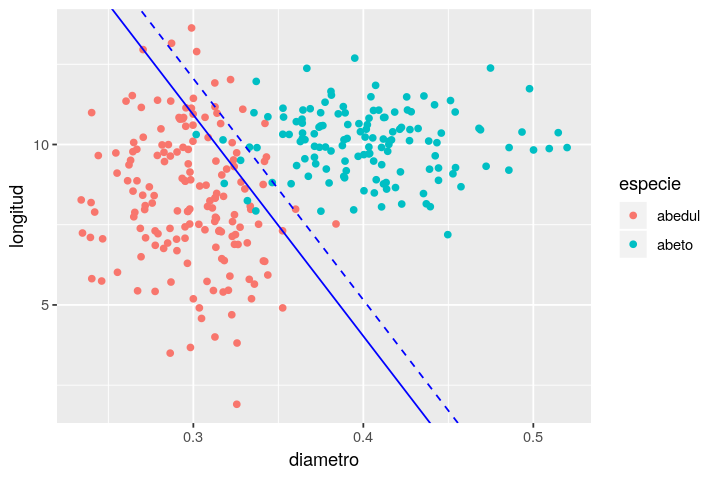

In [65]:
M<-matrix(rep(0,4),ncol = 2)
umbral <- -1

y_est=factor(ifelse(predict(model,arboles.test)< umbral,0,1),labels=c("abedul","abeto"))
idx_abedul<-arboles.test$especie=="abedul"
idx_abeto <-arboles.test$especie=="abeto"


M[1,1]=sum(y_est[idx_abedul]=="abedul")
M[1,2]=sum(y_est[idx_abeto]=="abedul")
M[2,1]=sum(y_est[idx_abedul]=="abeto")
M[2,2]=sum(y_est[idx_abeto]=="abeto")
M
table(y_est,arboles.test$especie)

ggplot(arboles.test,aes(x=diametro,y=longitud,color=especie))+geom_point()+
 geom_abline(intercept = (-betalg[1])/betalg[3],slope = -betalg[2]/betalg[3], color="blue", linetype="dashed")+
 geom_abline(intercept = (umbral-betalg[1])/betalg[3],slope = -betalg[2]/betalg[3], color="blue" )

### Medidas de calidad

Imaginemos que tenemos la siguiente matriz de confusión:

|.|Condición positiva|Condición negativa|
|-|-|-|
|Predecimos condición positiva| $M_{11}$ | $M_{12}$|
|Predecimos condición negativa| $M_{21}$| $M_{22}$ |

**Precisión** : $\frac{M_{11}}{M_{12}+M_{11}}$. Cuantos aciertos tengo del total de predicciones.

**Exhaustividad** (recall): $\frac{M_{11}}{M_{21}+M_{11}}$. Que ratio de los aciertos positivos soy capaz de encontrar.

**Exactitud** (Accuracy): $\frac{M_{11}+M_{22}}{M_{11}+M_{12}+M_{21}+M_{22}}$: Cuantas predicciones correctas he hecho.

**Valor-F**: $F_\beta=(1+\beta^2)\frac{Precisión·Exhaustividad}{\beta^2·Precisión+Exhaustividad}$



## Curva ROC

Se utiliza para ver la calidad de un detector, un clasificador binario capaz de detectar un elemento.
Se hace un barrido por todos los umbrales y se mide el valor de positivo verdadero en función de falso positivo.

Warning message:
“Removed 2 rows containing missing values (geom_path).”

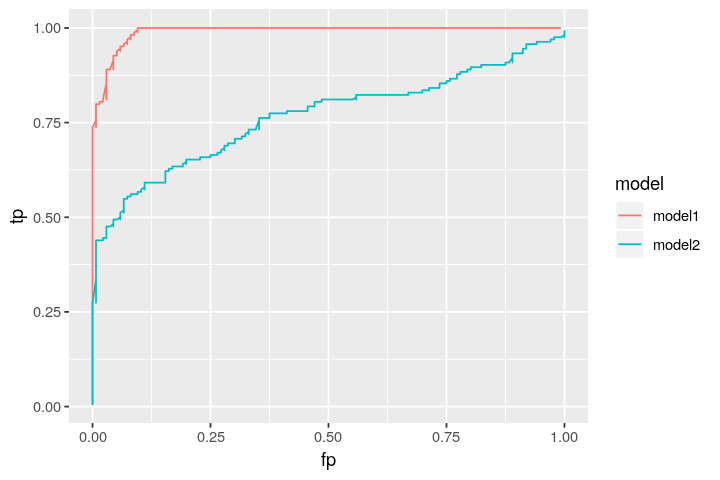

In [62]:
calctp_fp<-function(y_predict,y_real,th){
    y_est<-ifelse(y_predict<th,0,1)
    idx_abedul<-y_real==1
    idx_abeto <-y_real==0

    M<-table(y_est,arboles.test$especie)
    if (ncol(M)==2 && nrow(M)==2){
        truePositive<-M[1,1]/(M[1,1]+M[2,1])
        falsePositive<-M[1,2]/(M[1,2]+M[2,2])
        c(tp=truePositive,fp=falsePositive)
    }else{
        c(tp=NA,fp=NA)
    }
}

y_predict<-predict(model,arboles.test)
dfROC<-data.frame(th=unique(y_predict),tp=NA,fp=NA,model="model1")

for (i in 1:nrow(dfROC)){
    v<-calctp_fp(y_predict,arboles.test$especie.n,dfROC$th[i])
    dfROC$tp[i]<-v["tp"]
    dfROC$fp[i]<-v["fp"]
}

model2<-glm(data=arboles.train,formula=especie~longitud,family=binomial(link='logit'))
y_predict<-predict(model2,arboles.test)
dfROC2<-data.frame(th=unique(y_predict),tp=NA,fp=NA,model="model2")

for (i in 1:nrow(dfROC)){
    v<-calctp_fp(y_predict,arboles.test$especie.n,dfROC2$th[i])
    dfROC2$tp[i]<-v["tp"]
    dfROC2$fp[i]<-v["fp"]
}
dfROC<-rbind(dfROC,dfROC2)
dfROC<-dfROC[order(dfROC$fp),]
ggplot(data=dfROC,aes(x=fp,y=tp,color=model))+geom_path()

### Ejemplo: Peso de los niños al nacer

Este dataset contien información de bebes recien nacidos y sus padres. 
Podemos usarlo como clasificación para ver cuales son los factores que más afectan al niño en función de si la madre es o no fumadora.

Tenemos las siguientes variables que vamos a utilizar:

|Nombre|Variable|
|-|-|
|Birthweight| Peso al nacer (libras)|
|Gestation| Semanas que duró la gestación|
|motherage| Edad de la madre|
|smoker| Madre fumadora 0/1|


In [68]:
bwt<-read.csv("data/birthweight_reduced.csv")
bwt$smoker <- factor(bwt$smoker,labels=c("No","Yes"))
head(bwt)
#str(bwt)

id,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,LowBirthWeight
<int>,<int>,<int>,<dbl>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1313,12,17,5.8,33,No,24,0,58,99,26,16,0,66,1,0,Low
431,12,19,4.2,33,Yes,20,7,63,109,20,10,35,71,1,0,Low
808,13,19,6.4,34,No,26,0,65,140,25,12,25,69,0,0,Normal
300,12,18,4.5,35,Yes,41,7,65,125,37,14,25,68,1,1,Low
516,13,18,5.8,35,Yes,20,35,67,125,23,12,50,73,1,0,Low
321,13,19,6.8,37,No,28,0,62,118,39,10,0,67,0,0,Normal


In [69]:
model <- glm(data=bwt, formula = smoker~Birthweight + Gestation, family=binomial())
summary(model)


Call:
glm(formula = smoker ~ Birthweight + Gestation, family = binomial(), 
    data = bwt)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5581  -1.0716   0.6287   1.0444   1.9729  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -2.0995     5.4247  -0.387   0.6987  
Birthweight  -0.8307     0.3947  -2.105   0.0353 *
Gestation     0.2101     0.1802   1.166   0.2437  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 58.129  on 41  degrees of freedom
Residual deviance: 52.521  on 39  degrees of freedom
AIC: 58.521

Number of Fisher Scoring iterations: 4


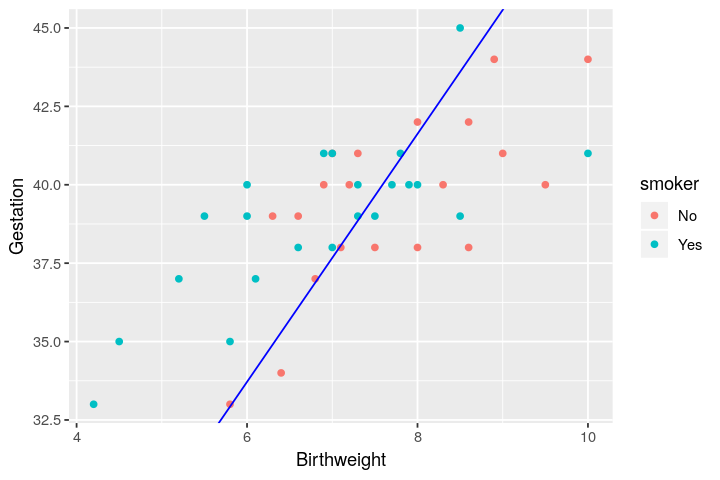

In [70]:
betalg <- model$coefficients
ggplot(data=bwt, aes(x=Birthweight ,y=Gestation, color=smoker))+geom_point()+
 geom_abline(intercept=-betalg[1]/betalg[3], slope=-betalg[2]/betalg[3],color="blue")

Vemos que el valor que más influye en si la madre es fumadora o no es en el peso del niño al nacer. No parece que afecte mucho al tiempo de gestación.

Podemos calcular la probabilidad de que la madre sea fumadora mirando el peso del niño y los coeficientes de la regresión logística:
\\[
    p = \frac{1}{1-e^{-\hat{Y}}}= \frac{1}{1-e^{-(\beta_0+\beta_1 · peso)}}   
\\]


(Intercept) Birthweight 
  3.8858430  -0.5202694

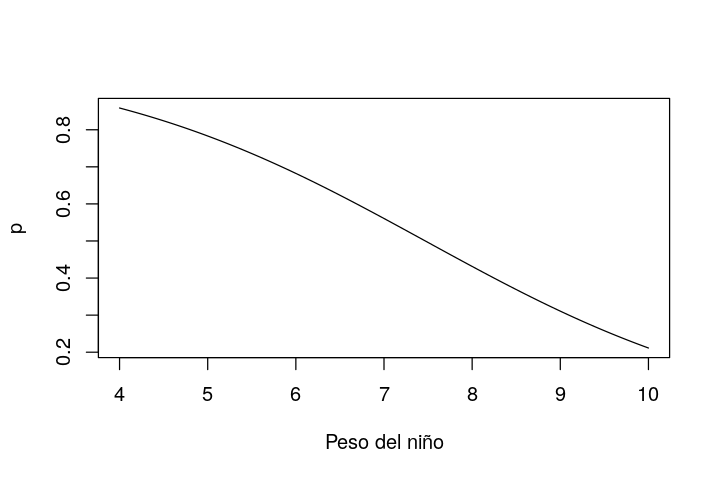

In [73]:
model <- glm(data=bwt, formula = smoker~Birthweight , family=binomial())
model$coefficients

peso<-seq(4,10,length.out=100)
p <- 1/(1+exp(-(model$coefficients[1]+peso*model$coefficients[2])))
plot(peso,p,t="l",xlab="Peso del niño")

In [75]:
pesoLibras <- 8
pesoKg <- pesoLibras*0.453592
ods <- predict(model,data.frame(Birthweight=pesoLibras))
print(paste("Para un peso de",pesoKg,"Kg es",exp(ods),
            "veces más probable que la madre sea fumadora"))
print(paste("Para un peso de",pesoKg,
            "Kg la probabilidad de que la madre sea fumadora es de",exp(ods)/(1+exp(ods))))


[1] "Para un peso de 3.628736 Kg es 0.758575882932769 veces más probable que la madre sea fumadora"
[1] "Para un peso de 3.628736 Kg la probabilidad de que la madre sea fumadora es de 0.431358060971299"


Otra forma de verlo es decir que cada libra que pesa el niño, la razón de probabilidades  de que la madre se fumadora respecto a la que no lo es:
\\[
log(\frac{p}{1-p})=\beta_0+\beta_1 · peso
\\]
\\[
\frac{p}{1-p}=e^{\beta_0}·e^{\beta_1 · peso}
\\]
Por cada unidad que aumenta el peso, el la razón de probabilidades aumenta $e^{\beta_1}$

In [76]:
peso1 <- 9
peso2 <- 10

p1 <- 1/(1+exp(-(model$coefficients[1]+peso1*model$coefficients[2])))
p2 <- 1/(1+exp(-(model$coefficients[1]+peso2*model$coefficients[2])))

(p2/(1-p2))/(p1/(1-p1))

(Intercept) 
  0.5943604

In [77]:
exp(model$coefficients[2])

Birthweight 
  0.5943604

### Censo

Dataset de: https://archive.ics.uci.edu/ml/datasets/adult

* age: continuous. 
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* fnlwgt: continuous. 
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* education-num: continuous. 
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
* sex: Female, Male. 
* capital-gain: continuous. 
* capital-loss: continuous. 
* hours-per-week: continuous. 
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [78]:
adult<-read.csv("data/adult.data.txt",
                col.names=c("age","workclass","fnlwgt","education","education-num","marital-status",
                           "occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week",
                           "native-country","50k"))

str(adult)

'data.frame':	32560 obs. of  15 variables:
 $ age           : int  50 38 53 28 37 49 52 31 42 37 ...
 $ workclass     : Factor w/ 9 levels " ?"," Federal-gov",..: 7 5 5 5 5 5 7 5 5 5 ...
 $ fnlwgt        : int  83311 215646 234721 338409 284582 160187 209642 45781 159449 280464 ...
 $ education     : Factor w/ 16 levels " 10th"," 11th",..: 10 12 2 10 13 7 12 13 10 16 ...
 $ education.num : int  13 9 7 13 14 5 9 14 13 10 ...
 $ marital.status: Factor w/ 7 levels " Divorced"," Married-AF-spouse",..: 3 1 3 3 3 4 3 5 3 3 ...
 $ occupation    : Factor w/ 15 levels " ?"," Adm-clerical",..: 5 7 7 11 5 9 5 11 5 5 ...
 $ relationship  : Factor w/ 6 levels " Husband"," Not-in-family",..: 1 2 1 6 6 2 1 2 1 1 ...
 $ race          : Factor w/ 5 levels " Amer-Indian-Eskimo",..: 5 5 3 3 5 3 5 5 5 3 ...
 $ sex           : Factor w/ 2 levels " Female"," Male": 2 2 2 1 1 1 2 1 2 2 ...
 $ capital.gain  : int  0 0 0 0 0 0 0 14084 5178 0 ...
 $ capital.loss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours.per.week

In [81]:
levels(adult$education)
numlevels<-length(levels(adult$education))
adult$education<-factor(adult$education,levels(adult$education)[c(4,5,6,7,1,2,3,8:numlevels)])

[1] " 10th"         " 11th"         " 12th"         " 1st-4th"     
 [5] " 5th-6th"      " 7th-8th"      " 9th"          " Assoc-acdm"  
 [9] " Assoc-voc"    " Bachelors"    " Doctorate"    " HS-grad"     
[13] " Masters"      " Preschool"    " Prof-school"  " Some-college"

In [82]:
levels(adult$education)


[1] " 1st-4th"      " 5th-6th"      " 7th-8th"      " 9th"         
 [5] " 10th"         " 11th"         " 12th"         " Assoc-acdm"  
 [9] " Assoc-voc"    " Bachelors"    " Doctorate"    " HS-grad"     
[13] " Masters"      " Preschool"    " Prof-school"  " Some-college"

In [83]:
model <- glm(data=adult, formula=X50k ~ age+education+sex, family = binomial())
model


Call:  glm(formula = X50k ~ age + education + sex, family = binomial(), 
    data = adult)

Coefficients:
           (Intercept)                     age       education 5th-6th  
              -6.49347                 0.04209                 0.40481  
     education 7th-8th           education 9th          education 10th  
               0.44734                 0.60425                 1.00045  
        education 11th          education 12th    education Assoc-acdm  
               0.98219                 1.44107                 2.85070  
   education Assoc-voc     education Bachelors     education Doctorate  
               2.83528                 3.52100                 4.61411  
     education HS-grad       education Masters     education Preschool  
               2.07379                 3.97556               -10.00974  
 education Prof-school  education Some-college                sex Male  
               4.62954                 2.49329                 1.32090  

Degrees of Freed

In [84]:
paste("Un hombre tiene ",exp(model$coefficients["sex Male"]),"veces más posibilidades de ganar más de 50k$ que una mujer")


[1] "Un hombre tiene  3.74680967166801 veces más posibilidades de ganar más de 50k$ que una mujer"

In [85]:
paste("Cada año que pasa hay ",exp(model$coefficients["age"]),"veces más posibilidades de ganar más de 50k$")


[1] "Cada año que pasa hay  1.04299004917257 veces más posibilidades de ganar más de 50k$"

In [86]:
paste("Una persona con Master tiene ",exp(model$coefficients["education Masters"]),"veces más posibilidades de ganar más de 50k$ que alguien con solo 1st-4th")

[1] "Una persona con Master tiene  53.2797505562235 veces más posibilidades de ganar más de 50k$ que alguien con solo 1st-4th"

In [89]:
#adult_master<-subset(adult,education==" Masters")
adult_master<-adult[grepl("Masters",adult$education) ,]
#summary(adult_master)
model <- glm(data=adult_master, formula=X50k ~ age+sex, family = binomial())
summary(model)


Call:
glm(formula = X50k ~ age + sex, family = binomial(), data = adult_master)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9198  -1.0800   0.8065   0.9454   1.7062  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.802067   0.229292  -7.859 3.86e-15 ***
age          0.025504   0.004763   5.354 8.59e-08 ***
sex Male     1.330184   0.111177  11.965  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2366.5  on 1722  degrees of freedom
Residual deviance: 2179.5  on 1720  degrees of freedom
AIC: 2185.5

Number of Fisher Scoring iterations: 4


In [90]:
model <- glm(data=adult_master, formula=X50k ~ age*sex, family = binomial())
summary(model)


Call:
glm(formula = X50k ~ age * sex, family = binomial(), data = adult_master)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0015  -1.0215   0.7866   0.9497   1.6324  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.440495   0.358470  -4.018 5.86e-05 ***
age           0.017270   0.007915   2.182   0.0291 *  
sex Male      0.767801   0.447205   1.717   0.0860 .  
age:sex Male  0.012857   0.009933   1.294   0.1955    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2366.5  on 1722  degrees of freedom
Residual deviance: 2177.8  on 1719  degrees of freedom
AIC: 2185.8

Number of Fisher Scoring iterations: 4


In [91]:
confint(model)

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),-2.152097567,-0.74404632
age,0.001792095,0.03289757
sex Male,-0.105838811,1.64892422
age:sex Male,-0.006633138,0.03234786


# Teoría de la información


Desarrollada por Claude Shannon en 1941 para cuantificar la cantidad de información que puede viajar por un canal de comunicaciones.

En los orígenes de las comunicaciones telefónicas cada conversación iba por un cable, lo que originaba que las ciudades estuvieran llevas de cables. La siguiente forto obtenida de [THW](http://ethw.org/File:Phoneline1903.jpg) muesta la construcción de un poste telefónico en 1903.

![Imagen no cargada. Edita y borra la ]( http://ethw.org/w/images/thumb/5/5d/Phoneline1903.jpg/433px-Phoneline1903.jpg )

Más adelante se aprendió a transmitir varios canales en un mismo cable, separándo cada conversación telefónica en un canal lógico a una particual frecuencia. Pero luego apareció la duda, ¿cual era la capacidad máxima del canal suponiendo que nuestra tecnología fuera perfecta? ¿cual es su límite teórico?. Aquí es donde entra la teoría de la información.

También se utiliza para saber cual es el límite máximo al cual podemos comprimir un fichero o la mejor forma de codificar una señal antes de transmitirla.

Para los más forofos y ávidos curiosos de todos los secretos de la entropía recomiendo esta guía: http://colah.github.io/posts/2015-09-Visual-Information/

## Entropía

Es un concepto prestado de termodinámica. Se utiliza para medir la cantidad de información que tiene una señal (o secuencia), es decir, mide su impredictivilidad, su desorden.

Su formula es:
\\[
H(X)=-\sum_{i=1}^n{P(x_i)log_bP(x_i)}
\\]
Donde $b$ es la base del logaritmo a usar, los valores más comunes son:
* base 2 : La medida sería en bits
* base e : Sería un logaritmo neperiano, la medida sería en nats
* base 10: Poco utilizado, la medida sería en bans.

### Ejemplo 

¿Cuantos bits se necesitan para decir si al tirar una moneda ha salido cara o cruz? Suponiendo que la moneda no está trucada.
Si la moneda no está trucada sabemos que:
\\[
P(cara)=P(cruz)=0.5
\\]
Entonces aplicando la formula anterior:
\\[
\begin{split}
H(X)&=-P(cara)log_2P(cara)-P(cruz)log_2P(cruz)\\
H(X)&=-2·0.5·log_2P(0.5) \\
H(X)&=-2·0.5·(-1) \\
H(X)&=1
\end{split}
\\]
Para representar 2 sucesos equiprobables hace falta como mínimo 1 bit.

Pero, ¿qué ocurre si los dos sucesos no son equiprobables?. Es decir, si:
\\[
\begin{split}
P(0)&=q=1-p \\
P(1)&=p
\end{split}
\\]

Warning message:
“Removed 2 rows containing missing values (geom_path).”

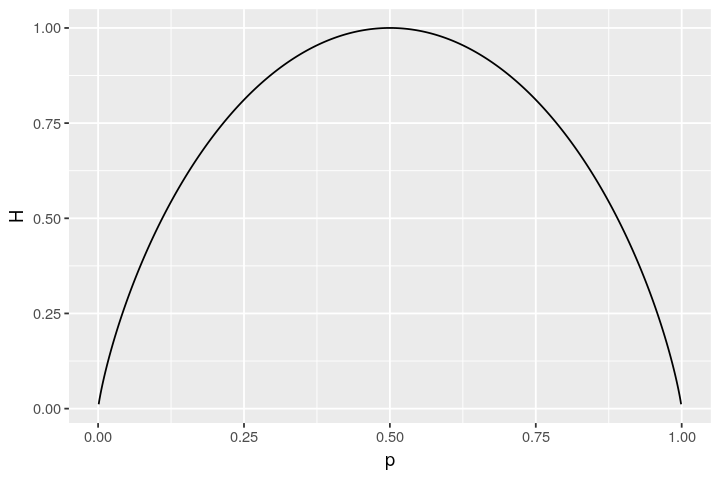

In [92]:
require(ggplot2)
ent<-data.frame(H=NA,p=seq(0,1,by=0.001))
for (i in 1:nrow(ent)){
    p<-ent$p[i]
    q<-1-p
    ent$H[i]<- -(q*log2(q)+p*log2(p))
}
ggplot(data=ent,aes(x=p,y=H))+geom_line()

![Imagen no cargada. Edita y borra la @ ](https://i1.wp.com/www.geeksaresexy.net/wp-content/uploads/2014/02/entropy.jpg @ )

Cuanto más aleatoria es la muestra mayor será su entropía, por eso en el caso de una moneda vemos que su entropía máxima se alcanza cuando la moneda no está trucada.
¿Qué ocurre con otras distribuciones?

Podemos instalar el paquete **entropy** para calcular la entropía de forma automática de diferentes variables.

Por ejemplo, sabemos que para representar todos los números enteros desde el 0 hasta el 1023 hacen falta 9 bits, ya que:  $2^0+2^1+2^2+2^3+2^4+2^5+2^6+2^7+2^8+2^9=1023$
Cada bit solo puede tener un valor 0 o un valor 1, no hay valores intermedios o superpuestos (olvidaros de los qbits de computación cuántica).
La entropía máxima la conseguiremos cuando tanto el bit 0 como el 1 son igual de probables

In [93]:
require(entropy)
e05<-entropy(rbinom(1023,size=1,prob=0.5),unit="log2")
e001<-entropy(rbinom(1023,size=1,prob=0.01),unit="log2")
print(paste("Entropía cuando p=0.5:",e05))
print(paste("Entropía cuando p=0.01:",e001))

Loading required package: entropy


[1] "Entropía cuando p=0.5: 9.03066713624694"
[1] "Entropía cuando p=0.01: 2.58496250072116"


In [94]:
egaus<-entropy(rnorm(1023),unit="log2",verbose = F,method="MM")
eunif<-entropy(runif(1023),unit="log2",verbose = F,method="MM")

print(paste("La entropía de una secuencia aleatoria gaussiana de 1023 elementos es:",egaus))
print(paste("La entropía de una secuencia aleatoria uniforme de 1023 elementos es:",eunif))

Warning message in log(freqs):
“NaNs produced”

[1] "La entropía de una secuencia aleatoria gaussiana de 1023 elementos es: 181.66685195155"
[1] "La entropía de una secuencia aleatoria uniforme de 1023 elementos es: 11.1812026127765"


### Entropía conjunta

La entropía conjunta de dos variables aleatorias sale simplemente de combinar ambas. Si dos variables son independientes su información conjunta es la suma de sus entropías individuales.

Su formula es:
\\[
H(X,Y)=-\sum_{x,y}^n{p(x,y)log_bp(x,y)}
\\]

### Entropía condicional

La entropía condicional es la entropía de una variable X, suponiendo Y conocida. Si X e Y son variables independientes $H(X|Y)=H(X)$.

Su formula es:
\\[
H(X|Y)=-\sum_{x,y}^n{p(x,y)log_bp(x|y)}
\\]

Se relaciona con la entropía conjunta como:
\\[
H(X|Y)=H(X,Y)-H(Y)
\\]

### Información mutua

Mide la cantidad de información que puede ser obtenida de una variable aleatoria X, observando otra variable aleatoria Y.
Su formula es:
\\[
I(X;Y)=\sum_{x,y}p(x,y)log_b \frac{p(x,y)}{p(x)p(y)}
\\]

La información mutua es simétrica:
I(X;Y)=I(Y;X)=H(X)-H(X|Y)=H(X)+H(Y)-H(X,Y)

También se cumple:
I(X;X)=H(X;X)=H(X)

Nos sirve para encontrar dependencias entre variables, sin importar si son lineales o no, a diferencia de la correlación que sólo sirve para encontrar dependencia entre relaciones lineales.

Se puede normalizar respecto a la entropía conjunta para que el cociente esté siempre ente 0 y 1, siendo 0 cuando las variables son independientes y 1 cuando son totalmente dependientes.

In [95]:
x<-seq(-10,10,by=0.1)
y<-x^2
cv<-cov(x,y)
cr<-cor(x,y)

freqs2d <- discretize2d(x,y,numBins1=50,numBins2=50)
Ixy<-mi.empirical(freqs2d)

Hxy<-entropy(freqs2d)

cr<-cor(x,y)
paste("La covarianza de las variables x,y es:",round(cv,2))
paste("La correlación de las variables x,y es:",round(cr,2))
paste("El ratio Ixy/Hxy es:",round(Ixy/Hxy,2))


[1] "La covarianza de las variables x,y es: 0"

[1] "La correlación de las variables x,y es: 0"

[1] "El ratio Ixy/Hxy es: 0.61"

### Entropía cruzada

La entropía se utiliza extensamente como función de coste en problemas de **Machine Learning de clasificación**. Esta función está definida para distribuciones. 

Su formula es:
\\[
H_q(p)=-\sum_{x}{p(x)log_b q(x)}
\\]

La entropía cruzada entre dos funciones de probabilidad $p$ y $q$, medidos sobre el mismo set de eventos $x$, mide el número medio de bits necesidatos para codificar una secuencia de $p$ utilizando la codificación de $q$.
Esto nos da una idea de como de diferentes o similares son dos funciones de probabilidad. Cuanto más diferentes sean las distribuciones $p$ y $q$ mayor será la entropía cruzada.

# Distribución conjunta

La distribución conjunta de dos variables A y B se refiere a la distribución de probabilidad de la intersección de ambos eventos.
Se representa como P(B,A) o  P(B $\cap$ A)

## Variables discretas


AVISO: ESTOS DATOS SON PURAMENTE INVENTADOS

Imagina que tenemos una tabla de contingencia que presenta el número de personas que les gusta Star Trek o StarWars función del sexo:

In [96]:
tbl<-as.table(matrix(c(122,58,214,120),dimnames = list(c("Star Trek","Star Wars"),c("Mujeres","Hombres")),nrow=2))
tbl

          Mujeres Hombres
Star Trek     122     214
Star Wars      58     120

**Probabilidad marginal**

En esta población, ¿Cual es la probabilidad de que a alguien le guste Star Wars?
\\[
P(\text{Star Wars})=\frac{58+120}{122+214+58+120}=0.34
\\]

In [97]:
print("La probabilidad de que a alguien le gusta Star Trek o Star Wars es:")
rowSums(tbl)/sum(tbl)

[1] "La probabilidad de que a alguien le gusta Star Trek o Star Wars es:"


Star Trek Star Wars 
0.6536965 0.3463035

**Probabilidad conjunta**

¿Cual es la probabilidad de que a un hombre le guste starwars?
\\[
P(\text{Hombre,Star Wars})=\frac{120}{122+214+58+120}=0.233
\\]

In [99]:
print("La matriz de la probabilidad conjunta es:")
prop.table(tbl)

[1] "La matriz de la probabilidad conjunta es:"


            Mujeres   Hombres
Star Trek 0.2373541 0.4163424
Star Wars 0.1128405 0.2334630

**Probabilidad condicional**

Suponiendo que nos fijemos solamente en los hombres, ¿cual es la probabilidad de que Star Wars sea la película más interesante?

\\[
P(\text{Star Wars|Hombre})=\frac{120}{214+120}=0.359
\\]


In [100]:
print("La matriz condicional para mujeres y hombres:")
prop.table(tbl,margin = 2)

[1] "La matriz condicional para mujeres y hombres:"


            Mujeres   Hombres
Star Trek 0.6777778 0.6407186
Star Wars 0.3222222 0.3592814

Suponiendo que nos fijemos solamente en los fans de Star Wars, ¿cual es la probabilidad de que el fan sea hombre?

\\[
P(\text{Hombre|Star Wars})=\frac{120}{120+58}=0.674
\\]

In [101]:
print("La matriz condicional para Star Trek y Star Wars :")
prop.table(tbl,margin = 1)

[1] "La matriz condicional para Star Trek y Star Wars :"


            Mujeres   Hombres
Star Trek 0.3630952 0.6369048
Star Wars 0.3258427 0.6741573

**Propiedades**
\\[
\begin{split}
P(\text{Star Wars,Hombre})&=P(\text{Hombre,Star Wars}) \\
P(\text{Hombre,Star Wars})&=P(\text{Hombre|Star Wars})·P(\text{Star Wars}) \\
P(\text{Star Wars,Hombre})&=P(\text{Star Wars|Hombre})·P(\text{Hombre})
\end{split}
\\]

## Variables continuas

### Dos variables independientes

En este caso: 
P(B,A)=P(B)·P(A)

Es fácil verlo porque su matriz de covarianza se parece a una matriz diagonal.

[1] "Matriz de covarianza:"


,A,B
A,0.255415161,-0.005884874
B,-0.005884874,0.986700875


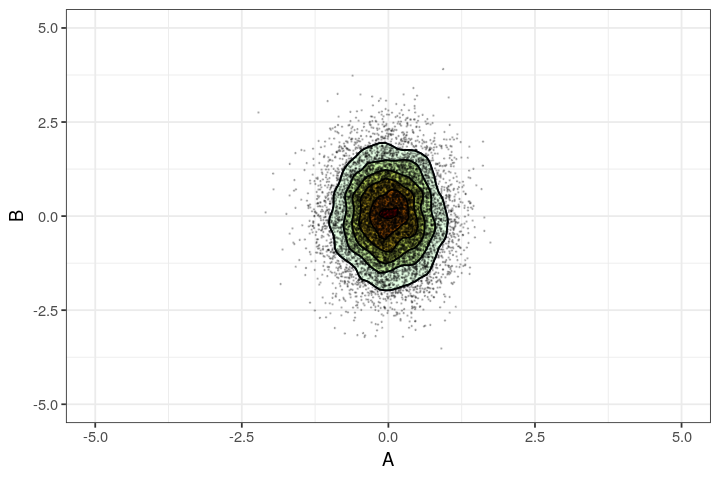

In [102]:
N<-10000
A<-rnorm(N,mean=0,sd=0.5)
B<-rnorm(N,mean=0,sd=1)
df<-data.frame(A,B)

print(paste("Matriz de covarianza:"))
cov(df)

library(ggplot2)
ggplot(df, aes(x=A, y=B))+geom_density2d(aes(colour=..level..)) + 
  stat_density2d(aes(fill=..level..,alpha=..level..),geom='polygon',colour='black') + 
  scale_fill_continuous(low="green",high="red") +    
  geom_point(alpha=0.2,size=0.1)+
  theme_bw()+theme(legend.position="none")+xlim(c(-5,5))+ylim(c(-5,5))

Como son independientes, la probabilidad condicional de B respecto a A es igual a la probabilidad de B

P(B|A)=P(B)

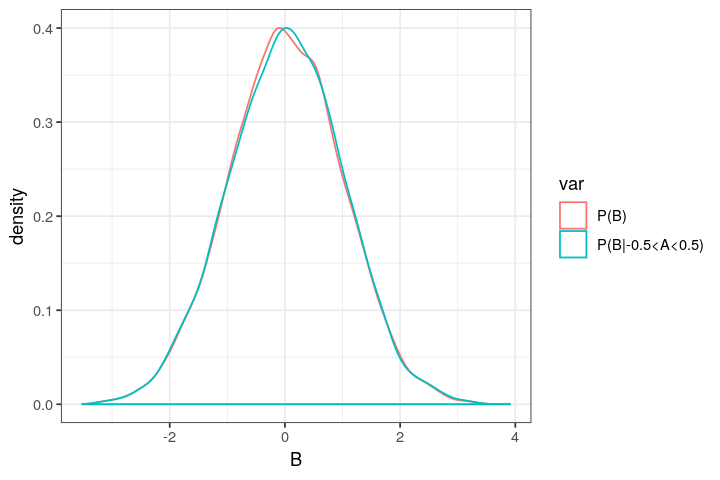

In [103]:
dfPartialProbs<-data.frame(B=B,var="P(B)")
dfPartialProbs<-rbind(dfPartialProbs,data.frame(B=df$B[df$A>-0.5 & df$A<0.5],var="P(B|-0.5<A<0.5)"))


ggplot(dfPartialProbs, aes(x=B,color=var))+geom_density()+
  theme_bw()

### Dos variables dependientes

En este caso: 
P(B,A)=P(B|A)·P(A)=P(A,B)=P(A|B)·P(B)

En este caso la matriz de covarianza no es diagonal.

[1] "Matriz de covarianza:"


,A,B
A,4.026677,4.009146
B,4.009146,8.081074


Warning message:
“Removed 10 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 10 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 10 rows containing missing values (geom_point).”

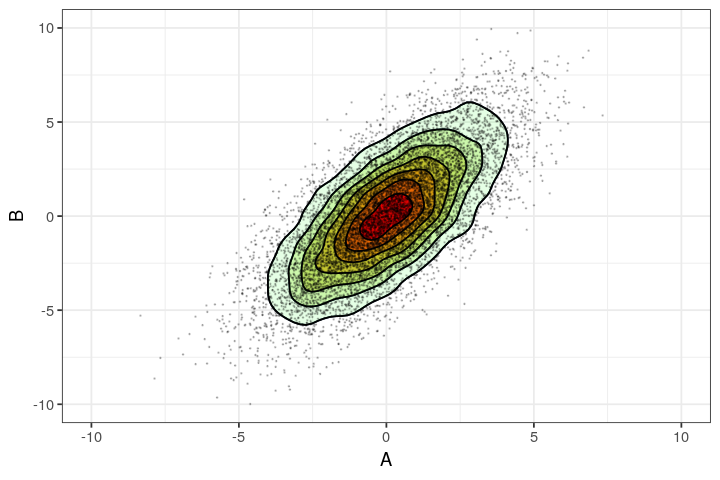

In [104]:
N<-10000
A<-rnorm(N,mean=0,sd=2)
B<-A+rnorm(N,mean=0,sd=2)
df<-data.frame(A,B)

print(paste("Matriz de covarianza:"))
cov(df)

library(ggplot2)
ggplot(df, aes(x=A, y=B))+geom_density2d(aes(colour=..level..)) + 
  stat_density2d(aes(fill=..level..,alpha=..level..),geom='polygon',colour='black') + 
  scale_fill_continuous(low="green",high="red") +    
  geom_point(alpha=0.2,size=0.1)+
  theme_bw()+theme(legend.position="none")+xlim(c(-10,10))+ylim(c(-10,10))

Como son dependientes, la probabilidad condicional de B respecto a A es diferente a la probabilidad de B
\\[
P(B|A) \neq P(B)
\\]

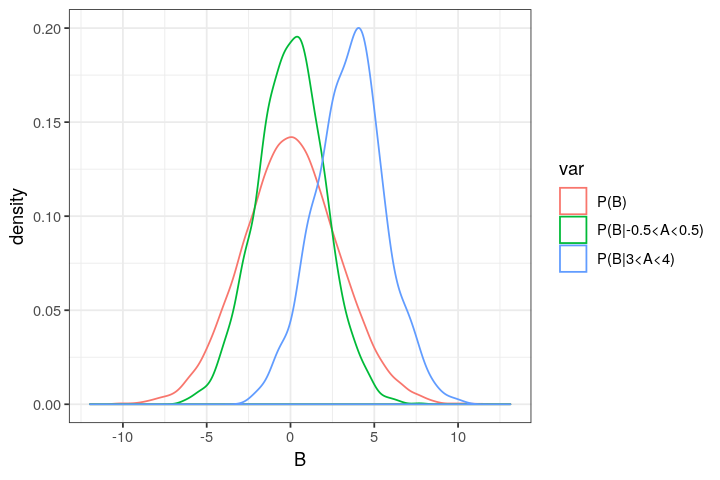

In [105]:
dfPartialProbs<-data.frame(B=B,var="P(B)")
dfPartialProbs<-rbind(dfPartialProbs,data.frame(B=df$B[df$A>-0.5 & df$A<0.5],var="P(B|-0.5<A<0.5)"))

dfPartialProbs<-rbind(dfPartialProbs,data.frame(B=df$B[df$A>3 & df$A<4],var="P(B|3<A<4)"))


ggplot(dfPartialProbs, aes(x=B,color=var))+geom_density()+
  theme_bw()

# Teorema de Bayes


El teorema de Bayes describe la probabilidad de un evento basado en conocimientos previos que puede estar relacionado con el evento. Su fórmula es bastente simple:
\\[
P(A|B)=\frac{P(B|A)·P(A)}{P(B)}=\frac{P(B,A)}{P(B)}
\\]
donde A y B son nuestras variables aleatorias y $P(B) \neq 0$:
* P(A|B) es la probabilidad condicional del evento A, sabiendo que ha ocurrido B
* P(B|A) es la probabilidad condicional del evento B, sabiendo que ha ocurrido A
* P(A) y P(B) es la probabilidad de observar A y B de forma independiente. Es conocido como la probabilidad **marginal**.
* P(B,A) o  P(B $\cap$ A): es la probabilidad de que ambos eventos A y B ocurran a la vez. 
 * Si son sucesos independientes P(B,A)=P(B)·P(A)
 * Si son sucesos dependientes P(B,A)=P(B|A)·P(A)


![]( ./pics/bayes1.jpg )

En la imagen anterior podemos ver dentro del cuadrado verde disparos rojos y blancos sobre un barco.
En total hay 35 disparos, 20 rojos y 15 blancos.

La probabilidad de elegir un disparo rojo al azar es:
\\[
\begin{split}
P(rojo)&=\frac{20}{35}=\frac{4}{7} \approx  0.571 \\
P(blanco)&=\frac{15}{35}=\frac{3}{7} \approx  0.428
\end{split}
\\]

La probabilidad de, en ese cuadrado, acertar al barco es:
\\[
P(barco)=\frac{4}{35} \approx  0.114
\\]

Si sabemos que se ha realizado un disparo **blanco**, ¿cuál es la probabilidad de que haya dado al **barco**?
\\[
P(barco|blanco)=\frac{3}{15} = 0.2
\\]

Si sabemos que se ha realizado un disparo **rojo**, ¿cuál es la probabilidad de que haya dado al **barco**?
\\[
P(barco|rojo)=\frac{1}{20} = 0.05
\\]

#### Apliquemos Bayes

El **barco** ha sido alcanzado por un disparo ¿Cuál es la probabilidad de que ese disparo sea **rojo**? 

Nos están preguntando por $P(rojo|barco)$. Conocemos P(barco|rojo), P(barco) y P(rojo), así que por el teorema de Bayes:

\\[
P(rojo|barco)=\frac{P(barco|rojo)·P(rojo)}{P(barco)} =\frac{0.05 ·\frac{20}{35} }{\frac{4}{35}}=\frac{1}{4}=0.25
\\]



El **barco** ha sido alcanzado por un disparo ¿Cuál es la probabilidad de que ese disparo sea **blanco**? 

Nos están preguntando por $P(blanco|barco)$. Conocemos P(barco|blanco), P(barco) y P(blanco), así que por el teorema de Bayes:

\\[
P(blanco|barco)=\frac{P(barco|blanco)·P(blanco)}{P(barco)} =\frac{\frac{3}{15} ·\frac{15}{35} }{\frac{4}{35}}=\frac{3}{4}=0.75
\\]


#### Probabilidad conjunta

¿Cual es la probabilidad de que un disparo de al **barco** y además sea **rojo**?

\\[
\begin{split}
P(barco,rojo)&=P(barco|rojo)·P(rojo)=\frac{1}{20}·\frac{20}{35}=\frac{1}{35} \\
P(barco,rojo)&=P(rojo|barco)·P(barco)=\frac{1}{4}·\frac{4}{35}=\frac{1}{35}
\end{split}
\\]


## Arboles bayesianos

Estamos en el año 2025, un terrible virus ha escapado de un laboratorio de máxima seguridad y está infectando a gente alrededor de todo el mundo convirtiendolos en zombies admiradores de [Nyan Cat](https://www.youtube.com/watch?v=QH2-TGUlwu4) aunque luego en apariencia llevan una vida normal. Se calcula que en este momento un **5% de la población** mundial está infectada.

Afortunadamente existe un test al que se puede someter a un individuo para ver si está infectado o no. Pero el test no es 100% fiable, nunca se tiene tanta seguridad. Si la persona está infectada el test acertará un 99% de las veces, en cambio si no está infectada el test acertará un 98% de las veces. Esto genera la siguiente **matriz de confusión**:

|. |Infectado|Sano|
|-|-|-|
|**Test=1**| 99%| 2% |
|**Test=0**| 1%| 98% |


Si elegimos una persona al azar y nuestro test dice que está infectado, ¿que posibilidades hay de que realmente esté infectado?
Queremos saber P(Zombie=1|Test=1)

Utilizando Bayes:
\\[
P(Zombie=1|Test=1)=\frac{P(Test=1|Zombie=1)·P(Zombie=1)}{P(Test=1)}
\\]
Pero desconocemos $P(Test=1)$, aunque podemos obtenerlo mediante:
\\[
\begin{split}
P(Test=1)&=P(Test=1|Zombie=1)·P(Zombie=1)+P(Test=1|Zombie=0)·P(Zombie=0) \\
P(Test=1)&=P(Test=1,Zombie=1)+P(Test=1,Zombie=0)
\end{split}
\\]
Es decir:
\\[
\begin{split}
P(Z=1|T=1)=\frac{P(T=1|Z=1)·P(Z=1)}{P(T=1|Z=1)·P(Z=1)+P(T=1|Z=0)·P(Z=0)} \\
P(Z=1|T=1)=\frac{0.99·0.05}{0.99·0.05+0.02·0.95}=0.7226 \\
\end{split}
\\]


Esta misma información se puede representar con un grafo acíclico:

![]( pics/bayestree1.png )

## El problema de Monty Hall

Este problema recibe su nombre tras el programa de televisión "Let's Make a Deal" presentado por Monty Hall en la década de 1970. El enunciado más famoso del problema, extraído de Parade Magazine en 1990:

*Supón que estás en un concurso, y se te ofrece escoger entre tres puertas: detrás de una de ellas hay un coche, y detrás de las otras, cabras. Escoges una puerta, digamos la nº1, y el presentador, que sabe lo que hay detrás de las puertas, abre otra, digamos la nº3, que contiene una cabra. Entonces te pregunta: "¿No prefieres escoger la nº2?". ¿Es mejor para ti cambiar tu elección?*


![]( pics/montyhall.png )


Tenemos tres hipótesis:
* $H_1$: El coche está tras la puerta 1
* $H_2$: El coche está tras la puerta 2
* $H_3$: El coche está tras la puerta 3

Evidentemente, como no tenemos ningún tipo de información adicional:
\\[
P(H_1)=P(H_2)=P(H_3)=\frac{1}{3}
\\]

Nuestra evidencia vendrá de Monty abriendo una puerta, evidentemente sabemos que:
* Monty siempre abrirá una puerta de las 2 que no hayamos seleccionado.
* Monty nunca abrirá la puerta que tenga el coche.


Nosotros estamos interesados en la probabilidad que el coche esté detrás de una puerta utilizando nuestro conocimiento.

Imaginemos que el **concursante selecciona la puerta 1**, a continuación **Monty selecciona la puerta 3**. Las siguientes **probabilidades condicionales** ocurren:
* Condición, el coche está tras la puerta 1: Puede abrir igualmente la puerta 2 o 3
\\[
P(M_3|H_1)=\frac{1}{2}=P(M_2|H_1)
\\]
* Condición, el coche está tras la puerta 2: Puede abrir solo la puerta 3:
\\[
P(M_3|H_2)=1
\\]
* Condición, el coche está tras la puerta 3: No podría abrir esa puerta:
\\[
P(M_3|H_3)=0
\\]

Desde nuestro punto de vista, la probabilidad marginal de que Monty elija la puerta 2 o 3 es la misma, porque no sabemos donde está el coche. Solo sabemos que nunca eligirá la puerta 1 porque es la que seleccionó el concursante:
\\[
P(M_2)=P(M_3)=\frac{1}{2}
\\]


Ahora hay dos opciones, cambiar a la puerta 2 o mantenerse en la puerta 1.
* Se mantiene en puerta 1, sabiendo que la puerta 3 no tiene premio:
\\[
P(H_1|M_3)=\frac{P(M_3|H_1)·P(H_1)}{P(M_3)}=\frac{\frac{1}{2}·\frac{1}{3}}{\frac{1}{2}}=\frac{1}{3}
\\]
* Se cambia a la puerta 2, sabiendo que la puerta 3 no tiene premio:
\\[
P(H_2|M_3)=\frac{P(M_3|H_2)·P(H_2)}{P(M_3)}=\frac{1·\frac{1}{3}}{\frac{1}{2}}=\frac{2}{3}
\\]

Así pues se ve que la probabilidad de cambiar de puerta es 2/3, mientras que la probabilidad de mantenerse con la original es 1/3.


In [ ]:
N<-10000
puerta_con_premio<-floor(runif(N,min=1,max=4))

seleccion_inicial_del_concursante<-floor(runif(N,min=1,max=4))
seleccion_cambiada_del_concursante<-rep(NA,N)

for (i in 1:N){
    
    # Monty selecciona una puerta
    if (puerta_con_premio[i]==1){
        if (puerta_con_premio[i]==seleccion_inicial_del_concursante[i]){
            seleccion_monty<-ifelse(runif(1)>0.5,2,3)
        }else{
            seleccion_monty<-ifelse(seleccion_inicial_del_concursante[i]==3,2,3)
        }
    }else if (puerta_con_premio[i]==2){
        if (puerta_con_premio[i]==seleccion_inicial_del_concursante[i]){
            seleccion_monty<-ifelse(runif(1)>0.5,1,3)
        }else{
            seleccion_monty<-ifelse(seleccion_inicial_del_concursante[i]==3,1,3)
        }        
    }else if (puerta_con_premio[i]==3){
        if (puerta_con_premio[i]==seleccion_inicial_del_concursante[i]){
            seleccion_monty<-ifelse(runif(1)>0.5,1,2)
        }else{
            seleccion_monty<-ifelse(seleccion_inicial_del_concursante[i]==1,2,1)
        }
    }
    
    # El concursante selecciona otra puerta
    puertas_prohibidas<-c(seleccion_monty,seleccion_inicial_del_concursante[i])
    seleccion_cambiada_del_concursante[i]<-which(is.na(match(1:3,puertas_prohibidas)))    
}

p1<-mean(seleccion_inicial_del_concursante==puerta_con_premio)
print(paste0("Si el concursante nunca cambia de puerta la probabilidad de acertar es:",p1))
p2<-mean(seleccion_cambiada_del_concursante==puerta_con_premio)
print(paste0("Si el concursante siempre cambia de puerta la probabilidad de acertar es:",p2))